#Prerequisit and Imports

In [1]:
!pip install requests

In [2]:
! pip install aiohttp

In [3]:
!python -m pip install dask[dataframe] --upgrade  # or python -m pip install

In [4]:
# Install the libaray that we will use for encoding later
!pip install category-encoders

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import re
import gc 
import traceback # we use traceback because we expect an error.
import dask.dataframe as dd
from copy import copy

import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score 
#Additional scklearn functions
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

from sklearn.impute import SimpleImputer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
%matplotlib inline
sns.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = 15, 5

#Data Exploration and Pre-processing
---


##Importing Data






In [ ]:
# %%time
# link_to_data = "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv"

# column_names = ["Transaction unique identifier", "Price", "Date of Transfer",
#                  "Postcode", "Property Type", "Old/New", "Duration", "PAON",
#                  "SAON", "Street", "Locality", "Town/City", "District", "County",
#                  "PPD Category Type", "Record Status - monthly file only"]

# data = pd.read_csv(link_to_data, encoding='utf-8', names= column_names, nrows=1000)

CPU times: user 1.99 s, sys: 31.1 s, total: 33.1 s
Wall time: 2min 43s


In [ ]:
# %%time
# data.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Transaction unique identifier      1000 non-null   object
 1   Price                              1000 non-null   int64 
 2   Date of Transfer                   1000 non-null   object
 3   Postcode                           1000 non-null   object
 4   Property Type                      1000 non-null   object
 5   Old/New                            1000 non-null   object
 6   Duration                           1000 non-null   object
 7   PAON                               1000 non-null   object
 8   SAON                               67 non-null     object
 9   Street                             976 non-null    object
 10  Locality                           961 non-null    object
 11  Town/City                          1000 non-null   object
 12  Distric

In [ ]:
# del data
# gc.collect()

52

In [9]:
%%time

link_to_data = "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv"

column_names = ["Transaction unique identifier", "Price", "Date of Transfer",
                 "Postcode", "Property Type", "Old/New", "Duration", "PAON",
                 "SAON", "Street", "Locality", "Town/City", "District", "County",
                 "PPD Category Type", "Record Status - monthly file only"]

try:
    data = dd.read_csv(link_to_data, encoding='utf-8', names= column_names)
except Exception:
    traceback.print_exc()

CPU times: user 170 ms, sys: 34.6 ms, total: 205 ms
Wall time: 2.61 s


In [ ]:
%%time
data.info(verbose=True, memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 26321785 entries, 0 to 340764
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Transaction unique identifier      26321785 non-null      object
 1   Price                              26321785 non-null      int64
 2   Date of Transfer                   26321785 non-null      object
 3   Postcode                           26279766 non-null      object
 4   Property Type                      26321785 non-null      object
 5   Old/New                            26321785 non-null      object
 6   Duration                           26321785 non-null      object
 7   PAON                               26317589 non-null      object
 8   SAON                               3069260 non-null      object
 9   Street                             25909892 non-null      object
10   Locality                           17453221 non-null      

In [ ]:
data.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,NaN,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


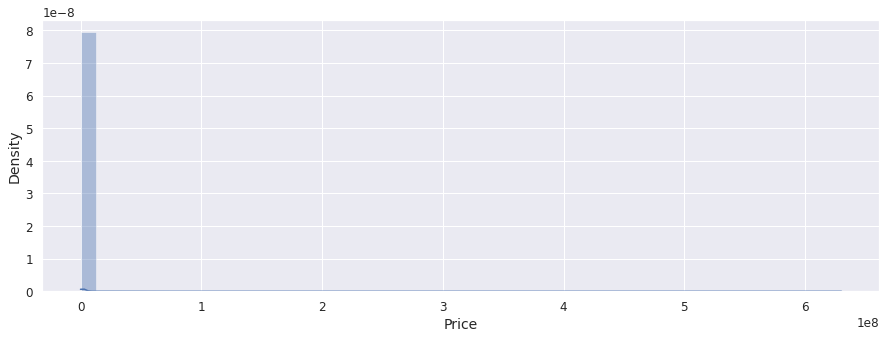

In [ ]:
#histogram
sns.distplot(data['Price']);

* Due to the large amount of data (26321785 rows) and lack of time, we will only look at housing sales in the County `GREATER LONDON`. 

In [10]:
# Filter by County == GREATER LONDON 
data = copy(data[data['County'] == 'GREATER LONDON'])
data.info(verbose=True, memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 3406054 entries, 12 to 339898
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Transaction unique identifier      3406054 non-null      object
 1   Price                              3406054 non-null      int64
 2   Date of Transfer                   3406054 non-null      object
 3   Postcode                           3400091 non-null      object
 4   Property Type                      3406054 non-null      object
 5   Old/New                            3406054 non-null      object
 6   Duration                           3406054 non-null      object
 7   PAON                               3406003 non-null      object
 8   SAON                               1098382 non-null      object
 9   Street                             3403679 non-null      object
10   Locality                           1667543 non-null      object
11 

In [ ]:
town_city_distribution = data["Town/City"].value_counts().compute()

In [ ]:
town_city_distribution

LONDON                 2030841
ROMFORD                  68521
CROYDON                  63390
ILFORD                   61745
ENFIELD                  58406
                        ...   
STAINES-UPON-THAMES          1
RUNCORN                      1
NORTHWICH                    1
NORTHAMPTON                  1
NEWPORT                      1
Name: Town/City, Length: 95, dtype: int64

## Preprocessing

In [11]:
def clean_column(text):
    # Replace whitespaces and hyphen with underscore "_"
    text = re.sub(r'[\-\s+]+', '_', text)
    return text

In [12]:
%%time
data.columns = [clean_column(item) for item in list(data.columns)]

CPU times: user 1.95 ms, sys: 0 ns, total: 1.95 ms
Wall time: 2.09 ms


In [26]:
data.columns

Index(['Transaction_unique_identifier', 'Price', 'Date_of_Transfer',
       'Postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPD_Category_Type', 'Record_Status_monthly_file_only'],
      dtype='object')

###Checking for duplicated data

In [ ]:
df = pd.DataFrame(
   {'x':[1,5,2,1,5,2],
    'y':['a','b','c','a','b','c']}
)
df_test = dd.from_pandas(df, npartitions=2)
df_test.head()

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:5970: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,x,y
0,1,a
1,5,b
2,2,c


In [ ]:
type(df_test)

dask.dataframe.core.DataFrame

In [ ]:
df_test = df_test.drop_duplicates()

In [ ]:
type(df_test)

pandas.core.frame.DataFrame

In [ ]:
%%time
print("Before droping duplicates the dataset row, cols:[{},{}]".format(data.shape[0].compute(),
                                                             data.shape[1]))

Before droping duplicates the dataset row, cols:[2031341,16]
CPU times: user 1min 51s, sys: 14.8 s, total: 2min 6s
Wall time: 3min 6s


In [ ]:
data = data.drop_duplicates()

In [ ]:
%%time
print("After droping duplicates the dataset row, cols:[{},{}]".format(data.shape[0].compute(),
                                                             data.shape[1]))

After droping duplicates the dataset row, cols:[2031341,16]
CPU times: user 2min 28s, sys: 16.7 s, total: 2min 45s
Wall time: 3min 34s


### Create Year column

In [13]:
# Convert the date of transfer to datetime format
data["Date_of_Transfer"] = dd.to_datetime(data["Date_of_Transfer"], 
                                          format='%Y-%m-%d %H:%M')
# Extract the year from the date of transfer
data["Year_of_Transfer"] = data["Date_of_Transfer"].dt.year

In [28]:
%%time
years_distribution = data["Year_of_Transfer"].value_counts().compute()

CPU times: user 1min 39s, sys: 14.2 s, total: 1min 53s
Wall time: 2min 59s


In [29]:
years_distribution = years_distribution.sort_index()
years_distribution

1995    108792
1996    135407
1997    157665
1998    148832
1999    172178
2000    152287
2001    165617
2002    177057
2003    152492
2004    159553
2005    138602
2006    173606
2007    167624
2008     82204
2009     76185
2010     92810
2011     90820
2012     94458
2013    114487
2014    129252
2015    129887
2016    122485
2017    117456
2018    110870
2019    107018
2020     86514
2021     41896
Name: Year_of_Transfer, dtype: int64

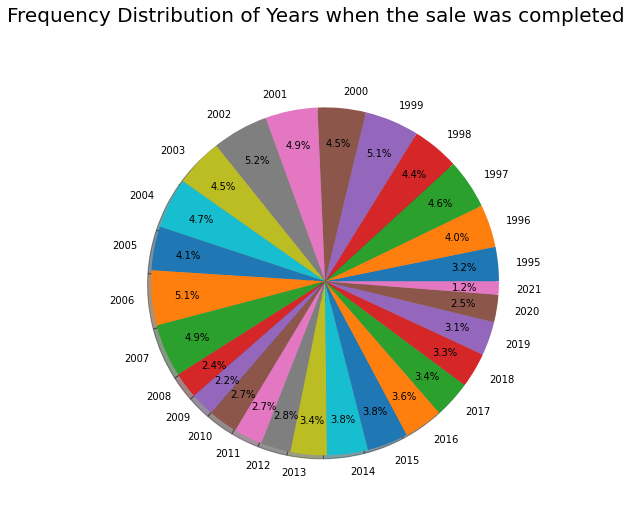

In [31]:
# Plot the Frequency Distribution of Year_of_Transfer column (when the sale was completed)
fig = plt.figure(figsize=(10,8))
fig.suptitle('Frequency Distribution of Years when the sale was completed', fontsize=20)
plt.pie(years_distribution.values, labels=years_distribution.index, pctdistance=0.8, 
        labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

### Checking for missing values


In [ ]:
# Crete a dataframe containing the numer of missing values by column 
missing_stats = data.isnull().sum().to_frame()
missing_stats.compute()

,0
Transaction_unique_identifier,0
Price,0
Date_of_Transfer,0
Postcode,5963
Property_Type,0
Old/New,0
Duration,0
PAON,51
SAON,2307672
Street,2375


In [ ]:
data.shape[0].compute()

3406054

In [ ]:
def missing_statistics(df):
    """
    Calculates the missing values statistics for a given dataframe and returns
    a dataframe containing the number of missing values per column and their 
    percentage.
    
    Parameters:
          df(pd.DataFrame):the data frame for which the missing values should 
          be calculated.
    Returns :
       df(pd.DataFrame): the dataframe that contain missing values statistics
    """
    
    # Calculate the number of missing values for each column
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['number_missing']
    # Convert the dask dataFrame to panda dataframe
    missing_stats = missing_stats.compute()
    # Get the number of rows in df
    nbr_rows = df.shape[0].compute()
    # Calculates the percentage of missing values according to the size of the dataset
    missing_stats['percentage_missing'] = np.round(100 * (missing_stats['number_missing'] / nbr_rows))
    # Sort the resulting dataset by the number of missing values
    missing_stats.sort_values(by='number_missing', ascending=False, inplace=True)

    return missing_stats

In [ ]:
%%time
# Checking the missing values in the dataset 
data_num_missing = missing_statistics(data)

CPU times: user 4min 6s, sys: 29.3 s, total: 4min 35s
Wall time: 6min 25s


In [ ]:
data_num_missing

,number_missing,percentage_missing
SAON,2307672,68.0
Locality,1738511,51.0
Postcode,5963,0.0
Street,2375,0.0
PAON,51,0.0
Record_Status_monthly_file_only,0,0.0
PPD_Category_Type,0,0.0
County,0,0.0
District,0,0.0
Town/City,0,0.0


In [ ]:
# Retreive all the columns which have missing values
cols_missing_values = list(data_num_missing[data_num_missing.number_missing > 0].index)
cols_missing_values

['SAON', 'Locality', 'Postcode', 'Street', 'PAON']

* As we can see in the table above that some columns have a lot of missing values.

  * the `SAON` (Secondary Addressable Object Name) with **2307672** missing values wich represent 68 % of data,
  * the `Locality` with **1738511** missing values wich represent 51 % of data,
  * the `Street` with **2375** missing values,
  * the `Postcode` with **5963** missing values,
  * and the `PAON` ( house number or name) with **51** missing values.

* At this level, we have not yet fully treated the missing values. But before we go further handling them, let's first check that each of variables is of the right type, i.e., categorical and boolean.

### Handling missing values
---
* For columns containing text, we replace them with an empty string.
* For the categorical columns, they must be replaced by the mode.
* For continuous columns, we replace them with the median.
* We will use SimpleImputer from Sklearn to replace missing values.

In [ ]:

def replace_missing_values(cols, df):
  """
  Takes a list of columns and a dataframe and imputes based on the column type. If it is an object type, the most_frequent value is used for imputation. If it is a float/int type, then the median value is used for imputation.
  Parameters :
       cols (list): list of columns
       df (pd.DataFrame): the dataframe containing these columns.

  Returns :
       df(pd.DataFrame): the imputed dataframe
  """
  for col in cols:
        if type(df[col].dtype) is pd.core.dtypes.dtypes.CategoricalDtype:
            print("Imputing {} column with most frequent value".format(col))
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df.loc[:, col] = mode_imputer.fit_transform(df[[col]])

        elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
            print("Imputing {} column with median value".format(col))
            median_imputer = SimpleImputer(strategy='median')
            df.loc[:, col] = median_imputer.fit_transform(df[[col]])

        else:
            raise ValueError("Invalid column type")
  return df

* Representing all string columns as object type is not an efficient approach. It's a good practice to typecast the object types to Categorical or Boolean if necessary because they make the operations on such columns much faster and we can use pd.get_dummies() to easily one-hot encode them.

* Since we are handling different types of columns, it is best to break them down by type and inspect the cleanliness of each type. We will start with the Object dtype

#### Object types
* Since we will only be dealing with Object features in this part, it is better to filter them out. We can create a separate DataFrame consisting of only these features so that any changes made to the new DataFrame are not reflected in the original one.


In [ ]:
data.select_dtypes(include=['object']).columns

Index(['Transaction_unique_identifier', 'Postcode', 'Property_Type', 'Old/New',
       'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City',
       'District', 'County', 'PPD_Category_Type',
       'Record_Status_monthly_file_only'],
      dtype='object')

In [ ]:
type(data.select_dtypes(include=['object']))

dask.dataframe.core.DataFrame

In [ ]:
# Create separate DataFrame consisting of only object dtype columns
cat_data = copy(data.select_dtypes(include=['object']))

cat_data.head()

,Transaction_unique_identifier,Postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type,Record_Status_monthly_file_only
12,{003DB740-4F22-46E5-AD3C-52EB15407DE5},BR3 4AT,T,N,F,56,NaN,EDEN ROAD,BECKENHAM,BECKENHAM,BROMLEY,GREATER LONDON,A,A
14,{8B5FB0C0-01CF-4584-9777-4F4908B02FEA},SW16 3BL,S,N,F,208,NaN,GREEN LANE,LONDON,LONDON,CROYDON,GREATER LONDON,A,A
15,{38008828-F33E-4F54-927C-4BB90B83248E},UB5 5LH,S,N,F,57,NaN,BENGARTH ROAD,NORTHOLT,NORTHOLT,EALING,GREATER LONDON,A,A
31,{D59CF71F-351B-4F86-8BCE-52EB5223D74E},N1 2JU,S,N,F,49,NaN,CANONBURY PARK NORTH,LONDON,LONDON,ISLINGTON,GREATER LONDON,A,A
48,{D5E86B66-DF72-489A-8B1B-4F49AA3AEC98},IG1 1PP,T,N,F,209,NaN,HAMPTON ROAD,ILFORD,ILFORD,REDBRIDGE,GREATER LONDON,A,A


In [ ]:
%%time
print("Object dtype in the dataset row, cols:[{},{}]".format(cat_data.shape[0].compute(),
                                                             cat_data.shape[1]))

Object dtype in the dataset row, cols:[3406054,14]
CPU times: user 2min 12s, sys: 16 s, total: 2min 28s
Wall time: 3min 16s


In [ ]:
summary = cat_data.describe(include=['object', 'category']).compute()
summary

,Transaction_unique_identifier,Postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type,Record_Status_monthly_file_only
unique,3406054,138747,5,2,3,50750,17796,38418,664,95,33,1,2,1
count,3406054,3400091,3406054,3406054,3406054,3406003,1098382,3403679,1667543,3406054,3406054,3406054,3406054,3406054
top,{FFFFFE71-D9FC-4232-AD14-819C838EB3D6},SW11 7AY,F,N,L,1,FLAT 2,HIGH STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A
freq,1,297,1717632,3094357,1770146,51906,63943,11111,899688,2030841,177641,3406054,3260527,3406054


In [ ]:
# Check the number of unique values for all Objects columns except the unique 
# transaction ID because it is a unique ID for each row.       
summary.loc['unique'][1:]

Postcode                           138747
Property_Type                           5
Old/New                                 2
Duration                                3
PAON                                50750
SAON                                17796
Street                              38418
Locality                              664
Town/City                              95
District                               33
County                                  1
PPD_Category_Type                       2
Record_Status_monthly_file_only         1
Name: unique, dtype: object

In [ ]:
# function to add value labels in the barplots
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', Bbox = dict(facecolor = 'yellow', alpha =.3))


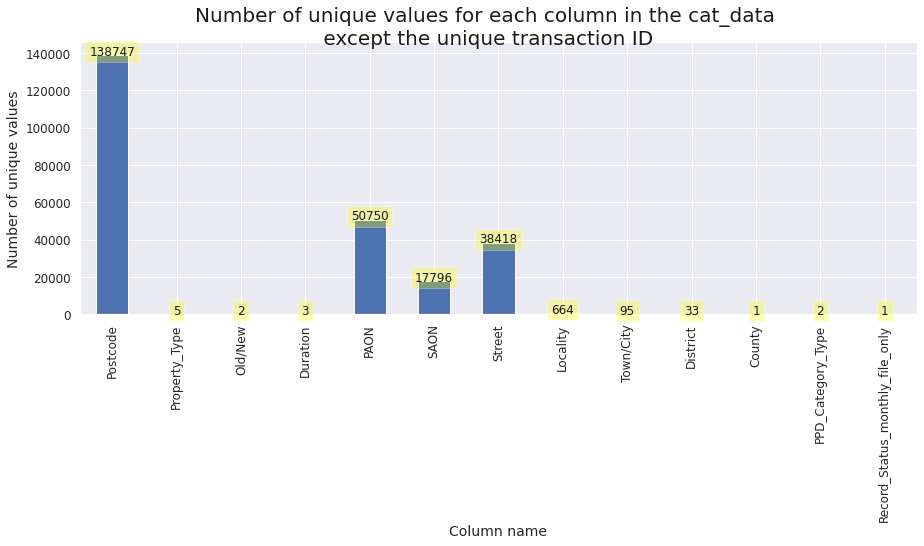

In [ ]:
# Calculate the number of unique values for each column
num_unique_values = summary.loc['unique'][1:]
# Plot the number of unique values for each column
num_unique_values.plot(kind='bar')
addlabels(x= num_unique_values.index,y= num_unique_values.values)
plt.suptitle('''Number of unique values for each column in the cat_data
 except the unique transaction ID''', fontsize=20)
plt.xlabel('Column name', fontsize=14)
plt.ylabel('Number of unique values', fontsize=14)
plt.xticks(rotation=90)
plt.show()
del num_unique_values

##### Transaction_unique_identifier
---
A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.
* contains a unique ID for the purchase and can be ignored (`no predictive power`)

#####Postcode
---
This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.

In [ ]:
print("In the column Postcode, there are %.0f%% missing values"%(data_num_missing.loc["Postcode", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Postcode", "number_missing"]))

In the column Postcode, there are 0% missing values
The number of missing values = 5963


In [ ]:
summary['Postcode']

unique      138747
count      3400091
top       SW11 7AY
freq           297
Name: Postcode, dtype: object

In [ ]:
print("In the column Postcode contain {} unique values".format(summary['Postcode']['unique']))

In the column Postcode contain 138747 unique values


* The Postcode (zip/postal code) is a high cardinality variable with 138747 unique values and 5963 missing values. It will not be appropriate for encoding since :
  * ordinal encoding would introduce order into the data, which would introduce bias in the later modeling part.
  * Onehot encoding will introduce 138747 additional features that will make the calculations more difficult. 


In [ ]:
cat_data['Postcode'].head()

12     BR3 4AT
14    SW16 3BL
15     UB5 5LH
31      N1 2JU
48     IG1 1PP
Name: Postcode, dtype: object

#####Property_Type
---
* `D` = Detached,
* `S` = Semi-Detached,
* `T` = Terraced, 
* `F` = Flats/Maisonettes,
* `O` = Other

**Note that:**
- we only record the above categories to describe property type, we do not separately identify bungalows
- end-of-terrace properties are included in the Terraced category above
- ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values, for example where a property comprises more than one large parcel of land

In [ ]:
print("In the column Property_Type, there are %.0f%% missing values"%(data_num_missing.loc["Property_Type", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Property_Type", "number_missing"]))

In the column Property_Type, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['Property_Type']

unique          5
count     3406054
top             F
freq      1717632
Name: Property_Type, dtype: object

In [ ]:
print("In the column Property_Type contain {} unique values".format(summary['Property_Type']['unique']))

In the column Property_Type contain 5 unique values


In [ ]:
%%time
property_type_distribution = cat_data["Property_Type"].value_counts().compute()

CPU times: user 2min 6s, sys: 14 s, total: 2min 20s
Wall time: 3min 17s


In [ ]:
property_type_distribution

F    1717632
T     984935
S     508034
D     150194
O      45259
Name: Property_Type, dtype: int64

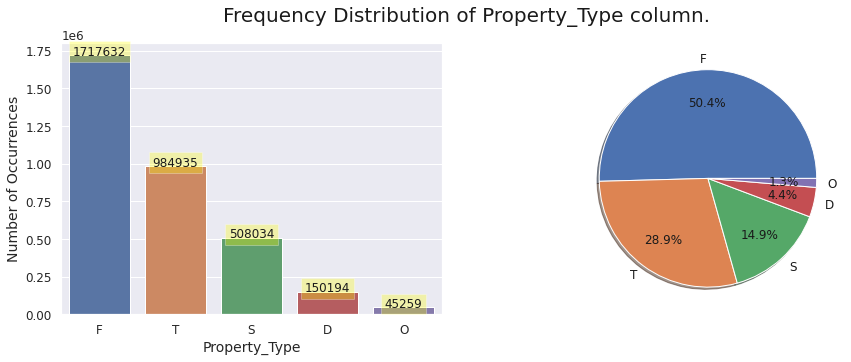

In [ ]:
# Click on the chart to zoom in
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
sns.barplot(x=property_type_distribution.index, 
            y=property_type_distribution.values)
addlabels(x= property_type_distribution.index,
          y= property_type_distribution.values)
fig.suptitle('Frequency Distribution of Property_Type column.', fontsize=20)
plt.xlabel('Property_Type', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=0)
plt.subplot(1,2,2);
plt.pie(property_type_distribution.values, labels=property_type_distribution.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

* We can clearly see that most sold houses are the `T= Terraced` ones, followed by `S= Semi-Detached` ones, followed by the `D= Detached` ones, followed by `F= Flats/Maisonettes` which is logical since most people are looking for large, comfortable detached houses with terraces. 
* The Property_Type is a categorical ORDINAL variable with 5 different levels, and it dose not have missing values. We will have just to Ordinal encode it.


#####Old/New
---
Indicates the **age** of the property and applies to all price paid transactions, residential and non-residential.
- `Y` = a newly built property, 
- `N` = an established residential building

In [ ]:
print("In the column Old/New, there are %.0f%% missing values"%(data_num_missing.loc["Old/New", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Old/New", "number_missing"]))

In the column Old/New, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['Old/New']

unique          2
count     3406054
top             N
freq      3094357
Name: Old/New, dtype: object

In [ ]:
print("In the column Old/New contain {} unique values".format(summary['Old/New']['unique']))

In the column Old/New contain 2 unique values


In [ ]:
%%time
old_new_distribution = cat_data["Old/New"].value_counts().compute()

CPU times: user 2min 13s, sys: 15.7 s, total: 2min 28s
Wall time: 3min 17s


In [ ]:
old_new_distribution

N    3094357
Y     311697
Name: Old/New, dtype: int64

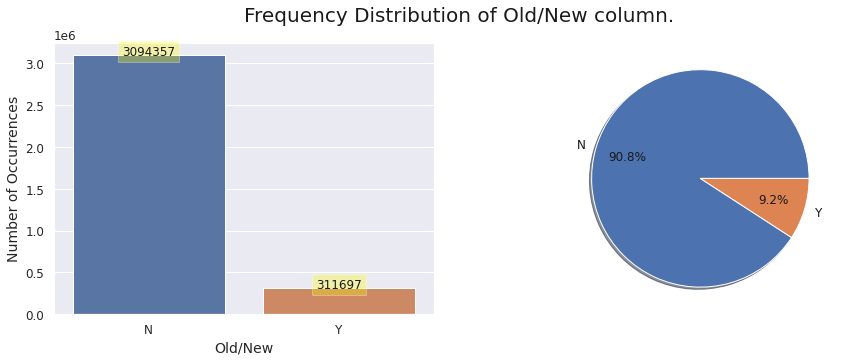

In [ ]:
# Click on the chart to zoom in
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
sns.barplot(x=old_new_distribution.index, 
            y=old_new_distribution.values)
addlabels(x= old_new_distribution.index,
          y= old_new_distribution.values)
fig.suptitle('Frequency Distribution of Old/New column.', fontsize=20)
plt.xlabel('Old/New', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=0)

plt.subplot(1,2,2);

plt.pie(old_new_distribution.values, labels=old_new_distribution.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

* We can clearly see that most of the houses sold are established residential buildings, which makes sense since most people know that the price of a newly built property is higher than that of an established residential building.

* Old/New is a categorical ORDINAL variable with 2 different levels, and there are no missing values. We will simply have to encode it as ordinal.


#####Duration
---
Relates to the tenure:
- `F` = Freehold,
- `L` = Leasehold etc.

Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.

In [ ]:
print("In the column Duration, there are %.0f%% missing values"%(data_num_missing.loc["Duration", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Duration", "number_missing"]))

In the column Duration, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['Duration']

unique          3
count     3406054
top             L
freq      1770146
Name: Duration, dtype: object

In [ ]:
print("In the column Duration contain {} unique values".format(summary['Duration']['unique']))

In the column Duration contain 3 unique values


In [ ]:
%%time
duration_distribution = cat_data["Duration"].value_counts().compute()

CPU times: user 2min 11s, sys: 15.6 s, total: 2min 26s
Wall time: 3min 17s


In [ ]:
duration_distribution

L    1770146
F    1635816
U         92
Name: Duration, dtype: int64

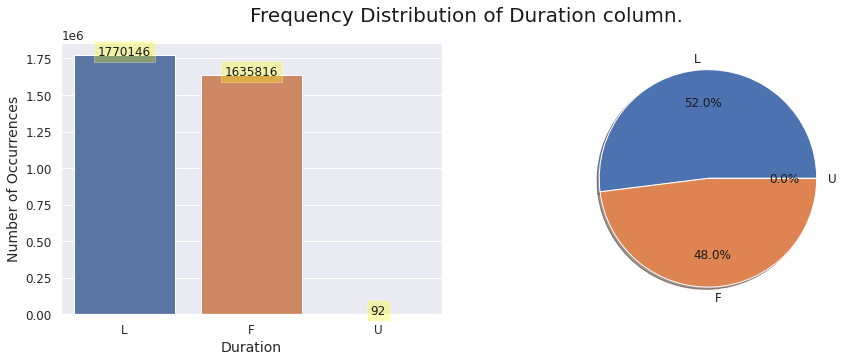

In [ ]:
# Click on the chart to zoom in
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
sns.barplot(x=duration_distribution.index, 
            y=duration_distribution.values)
addlabels(x= duration_distribution.index,
          y= duration_distribution.values)
fig.suptitle('Frequency Distribution of Duration column.', fontsize=20)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=0)

plt.subplot(1,2,2);

plt.pie(duration_distribution.values, labels=duration_distribution.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

  
* We can clearly see that most of the houses in GRETER LONDON sold are  LEASEHOLD types (1770146 purchase), which makes sense since it is the most developed county in ENGLAND and people could not own the building and the land at the same time since it is very expencive.

* Duration is a categorical ORDINAL variable with 3 different levels, and there are no missing values. We will simply have to encode it as ordinal. 

#####PAON
---
Primary Addressable Object Name. Typically the house number or name.


In [ ]:
print("In the column PAON, there are %.0f%% missing values"%(data_num_missing.loc["PAON", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["PAON", "number_missing"]))

In the column PAON, there are 0% missing values
The number of missing values = 51


In [ ]:
summary['PAON']

unique      50750
count     3406003
top             1
freq        51906
Name: PAON, dtype: object

In [ ]:
print("In the column PAON contain {} unique values".format(summary['PAON']['unique']))

In the column PAON contain 50750 unique values


* The PAON is a high cardinality variable with 50750 unique values and 51 missing values it will not be appropriate for encoding since :
  * ordinal encoding would introduce order into the data, which would introduce bias in the later modeling part.
  * Onehot encoding will introduce 508466 additional features that will make the calculations more difficult. 


In [ ]:
data["PAON"].tail()

339894                     34
339895                     12
339896         MORELAND COURT
339897    PRINCESS PARK MANOR
339898                    104
Name: PAON, dtype: object

#####SAON
---
Secondary Addressable Object Name. Where a property has been divided into separate units (for example, flats), the PAON (above) will identify the building and a SAON will be specified that identifies the separate unit/flat

In [ ]:
print("In the column SAON, there are %.0f%% missing values"%(data_num_missing.loc["SAON", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["SAON", "number_missing"]))

In the column SAON, there are 68% missing values
The number of missing values = 2307672


In [ ]:
summary['SAON']

unique      17796
count     1098382
top        FLAT 2
freq        63943
Name: SAON, dtype: object

In [ ]:
print("In the column SAON contain {} unique values".format(summary['SAON']['unique']))

In the column SAON contain 17796 unique values


In [ ]:
data["SAON"].tail()

339894         NaN
339895         NaN
339896     FLAT 38
339897    FLAT 218
339898         NaN
Name: SAON, dtype: object

* The SAON is a high cardinality variable with 17796 unique values and 2307672 missing values it will not be appropriate for encoding since :
  * ordinal encoding would introduce order into the data, which would introduce bias in the later modeling part.
  * Onehot encoding will introduce 17796 additional features that will make the calculations more difficult. 


#####Street
---
the name of the street for example "ALDRICH DRIVE"

In [ ]:
print("In the column Street, there are %.0f%% missing values"%(data_num_missing.loc["Street", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Street", "number_missing"]))

In the column Street, there are 0% missing values
The number of missing values = 2375


In [ ]:
summary['Street']

unique          38418
count         3403679
top       HIGH STREET
freq            11111
Name: Street, dtype: object

In [ ]:
print("In the column Street contain {} unique values".format(summary['Street']['unique']))

In the column Street contain 38418 unique values


In [ ]:
data["Street"].tail()

339894    ST MARYS AVENUE
339895       COBHAM CLOSE
339896      FINCHLEY ROAD
339897        ROYAL DRIVE
339898        FERNEY ROAD
Name: Street, dtype: object

* The Street is a high cardinality variable with 38418 unique values and 2375 missing values it will not be appropriate for encoding since :
  * ordinal encoding would introduce order into the data, which would introduce bias in the later modeling part.
  * Onehot encoding will introduce 38418 additional features that will make the calculations more difficult. 


#####Locality
---
locality may be used to identify smaller urban and rural places. However, locality is not consistently used; for example, in an urban area locality may only be included in an address in order to distinguish between multiple streets with the same name in a town. In addition, HM Land Registry addresses have been collected over many years and over time inconsistencies may have occurred.

In [ ]:
print("In the column Locality, there are %.0f%% missing values"%(data_num_missing.loc["Locality", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Locality", "number_missing"]))

In the column Locality, there are 51% missing values
The number of missing values = 1738511


In [ ]:
summary['Locality']

unique        664
count     1667543
top        LONDON
freq       899688
Name: Locality, dtype: object

In [ ]:
print("In the column Locality contain {} unique values".format(summary['Locality']['unique']))

In the column Locality contain 664 unique values


In [ ]:
data["Locality"].head()

12    BECKENHAM
14       LONDON
15     NORTHOLT
31       LONDON
48       ILFORD
Name: Locality, dtype: object

* The Locality is a high cardinality variable with 23716 unique values and 8868564 missing values it will not be appropriate for encoding since :
  * ordinal encoding would introduce order into the data, which would introduce bias in the later modeling part.
  * Onehot encoding will introduce 23716 additional features that will make the calculations more difficult. 


#####Town/City
---
contains the town or city in which the property was located. You can judge a property to be in London if this field contains the word "London"

In [ ]:
print("In the column Town/City, there are %.0f%% missing values"%(data_num_missing.loc["Town/City", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Town/City", "number_missing"]))

In the column Town/City, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['Town/City']

unique         95
count     3406054
top        LONDON
freq      2030841
Name: Town/City, dtype: object

In [ ]:
print("In the column Town/City contain {} unique values".format(summary['Town/City']['unique']))

In the column Town/City contain 95 unique values


In [ ]:
%%time
town_city_distribution = cat_data["Town/City"].value_counts().compute()

CPU times: user 2min 13s, sys: 14.6 s, total: 2min 28s
Wall time: 3min 19s


In [ ]:
town_city_distribution

LONDON                 2030841
ROMFORD                  68521
CROYDON                  63390
ILFORD                   61745
ENFIELD                  58406
                        ...   
STAINES-UPON-THAMES          1
RUNCORN                      1
NORTHWICH                    1
NORTHAMPTON                  1
NEWPORT                      1
Name: Town/City, Length: 95, dtype: int64

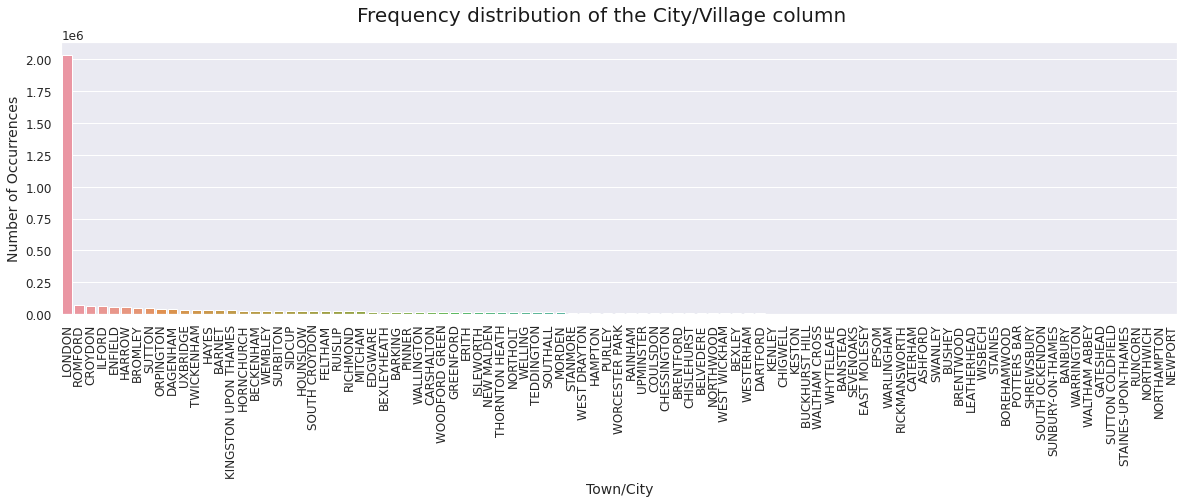

In [ ]:
# Click on the chart to zoom in
aux = town_city_distribution
fig = plt.figure(figsize=(20,5))
sns.barplot(x=aux.index, 
            y=aux.values)
# addlabels(x= aux.index,
#           y= aux.values)
fig.suptitle('Frequency distribution of the City/Village column(only GREATER LONDON)', fontsize=20)

plt.xlabel('Town/City', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=90)
plt.show()

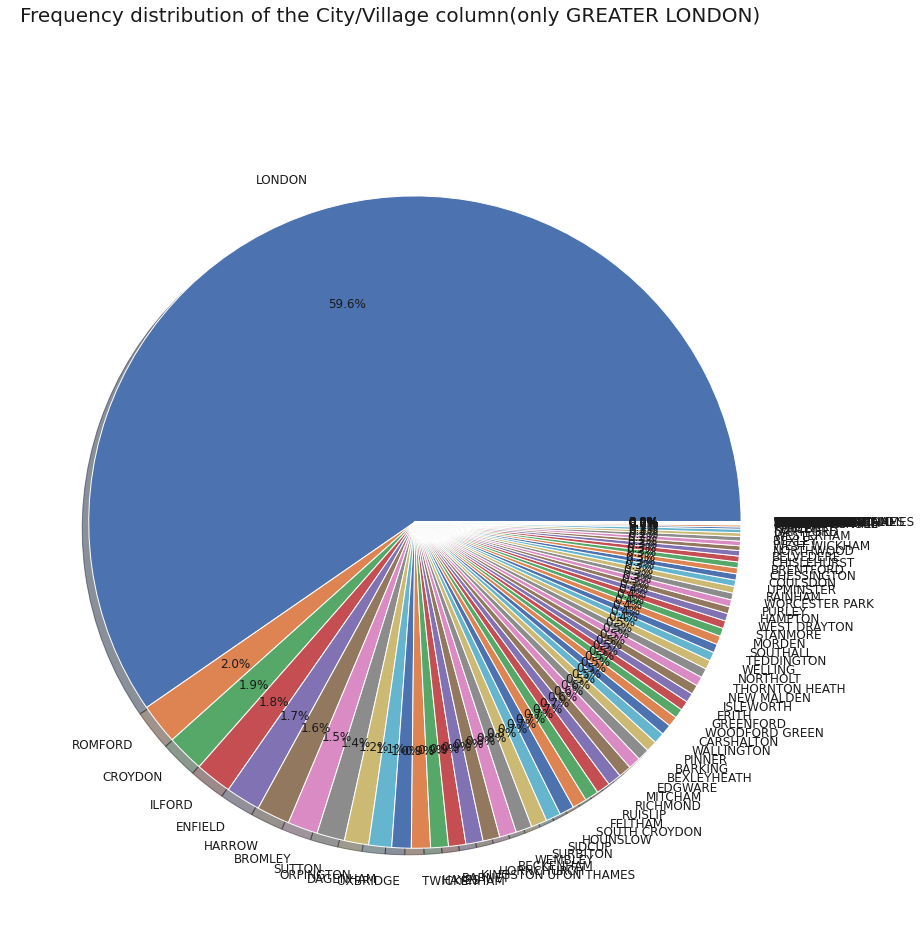

In [ ]:
fig = plt.figure(figsize=(28,15))
fig.suptitle('Frequency distribution of the City/Village column(only GREATER LONDON)', fontsize=20)
plt.pie(aux.values, labels=aux.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

* As a basic model, I'll start by using one of the variables that describe the location of the houses.

* We can clearly see that most of the houses sold are located in LONDON (2030841 purchases), which is logical since it is the most developed city with the strongest economy compared to other cities.

* Since we have the `Town/City and, District and County`, we know that there are many cities in a given county and that the location can be reached using the city and district. Often a metropolitan district can cover more than one city or town. `So we will use City/Village, as it covers the location even more accurately than District and County, which we could ignore for now as we implement our basic model.`

* As we can see, the Town/City column is a high cardinality categorical NOMINAL variable that does not contain NaNs and contains 95 unique levels, and there are some rare levels with low frequency, using One-Hot/Dummy encoding to encode it will introduce sparsity into the dataset, i.e., several columns with 0s and a few with 1s, the models will struggle with sparse and large data and this could lead to a Dummy variable trap.

* `ONE-HOT Encoding:` We can simply one-hot encode it, even if One-Hot/Dummy to encode it will introduce sparsity into the dataset, i.e., we are going to try it and make many other approach of encoding and keep the one that perform well on the prediction parte. After ONE-HOT encoding we will have 95 features that represent the City/town.

* `Frequency Encoding:` This way we use the frequency of categories as labels. In our case we can lose valuable information since there are many different categories with the same amount of observations count, this is because we replace them with the same number so we will avoid using it.

* `Binary Encoding:` Binary encoding converts a category into binary digits. Each binary digit creates one feature column. since City/Town contain n = 95 unique categories, then binary encoding results in the log(base 2)ⁿ features so it will need just seven (7) features (math.log(95,2) = 6.569855 ​ ≃ 7).

* `Target Encoding:` Target Encoding is defined as the process in which “features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data” and it is dependent on the distribution of the target and since we have the target we will give it a chance.

* `Hashing Encoding:` Hashing uses md5 algorithm to convert the string into a fixed-length shorter string that we can define by using the parameter n_components. If we set the parameter to 5 then it doesn’t matter to the algorithm whether the length of our category is 7 or 95, it will convert it into a string of length 5 which will finally give us 5 different columns representing our categorical value.




#####District

---
contains the town or city in which the property was located. You can judge a property to be in London if this field contains the word "London"

In [ ]:
print("In the column District, there are %.0f%% missing values"%(data_num_missing.loc["District", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["District", "number_missing"]))

In the column District, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['District']

unique            33
count        3406054
top       WANDSWORTH
freq          177641
Name: District, dtype: object

In [ ]:
print("In the column District contain {} unique values".format(summary['District']['unique']))

In the column District contain 33 unique values


In [ ]:
%%time
district_distribution = cat_data["District"].value_counts().compute()

CPU times: user 2min 12s, sys: 14.3 s, total: 2min 26s
Wall time: 3min 20s


In [ ]:
district_distribution

WANDSWORTH                177641
BROMLEY                   159833
CROYDON                   158878
BARNET                    145752
LAMBETH                   128394
ENFIELD                   123663
CITY OF WESTMINSTER       120410
EALING                    119309
LEWISHAM                  118014
TOWER HAMLETS             112671
HILLINGDON                112275
SOUTHWARK                 109747
REDBRIDGE                 109016
BEXLEY                    104687
RICHMOND UPON THAMES      104255
HAVERING                  102942
GREENWICH                 102336
WALTHAM FOREST            101377
SUTTON                     97172
NEWHAM                     94599
MERTON                     93555
HOUNSLOW                   92268
BRENT                      90025
HARINGEY                   88621
KENSINGTON AND CHELSEA     85293
HARROW                     85005
HAMMERSMITH AND FULHAM     83400
CAMDEN                     82628
KINGSTON UPON THAMES       80644
ISLINGTON                  74822
HACKNEY   

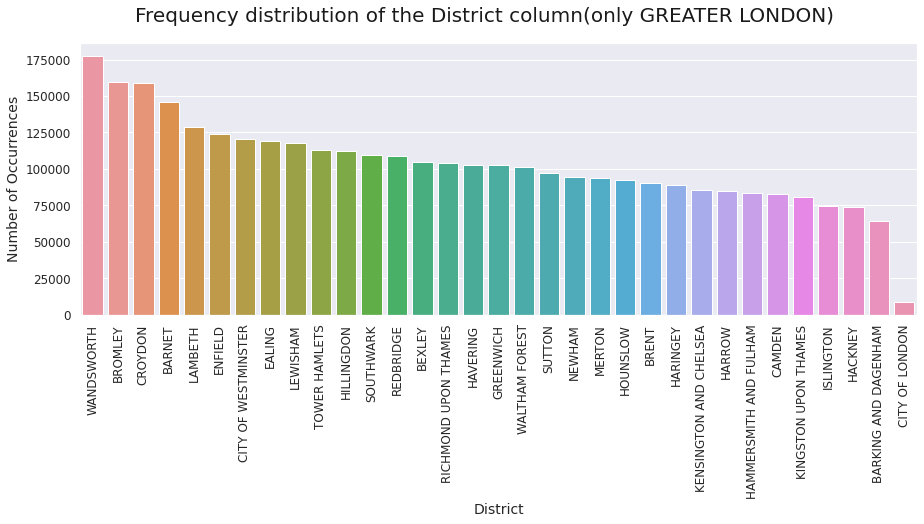

In [ ]:
# Click on the chart to zoom in
aux = district_distribution
fig = plt.figure(figsize=(15,5))
sns.barplot(x=aux.index, 
            y=aux.values)
# addlabels(x= aux.index,
#           y= aux.values)
fig.suptitle('Frequency distribution of the District column(only GREATER LONDON)', fontsize=20)

plt.xlabel('District', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=90)
plt.show()

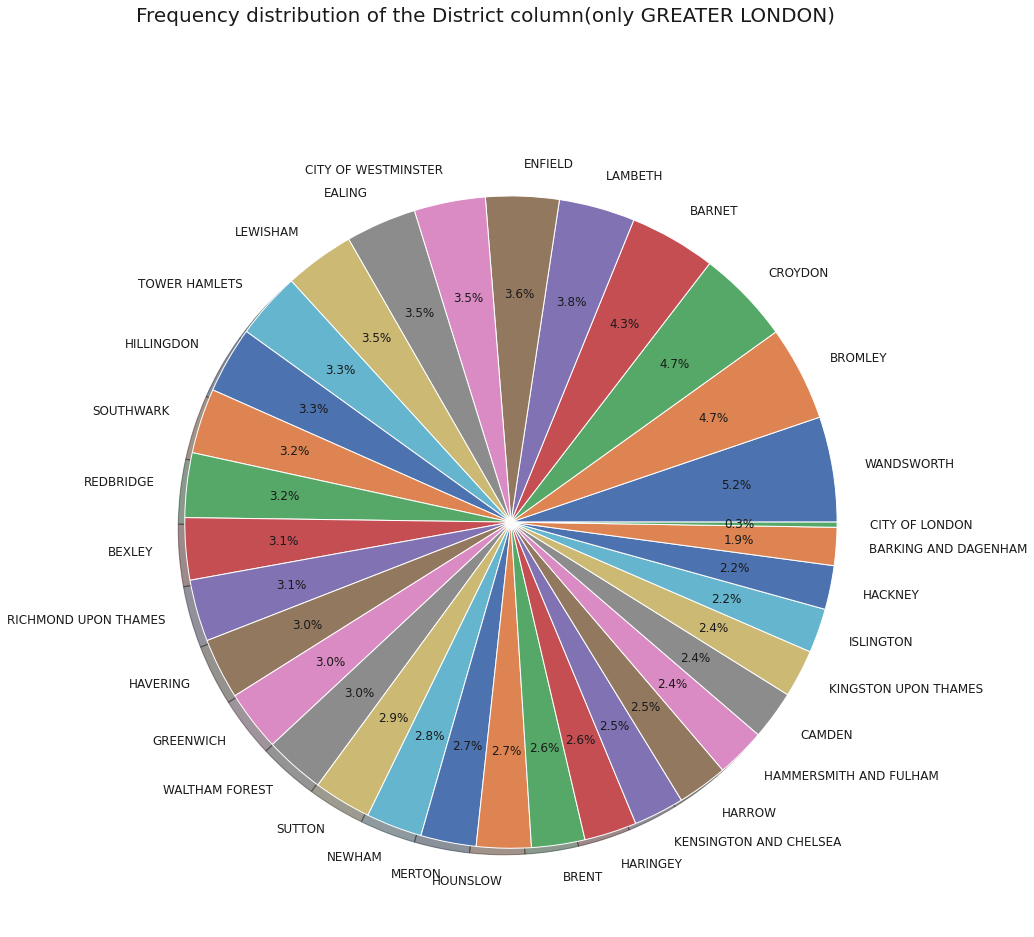

In [ ]:
fig = plt.figure(figsize=(28,15))
fig.suptitle('Frequency distribution of the District column(only GREATER LONDON)', fontsize=20)
plt.pie(aux.values, labels=aux.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

* As we said before since we have the `Town/City and, District and County`, we know that there are many cities in a given county and that the location can be reached using the city and district. Often a metropolitan district can cover more than one city or town. `So we will use City/Village, as it covers the location even more accurately than District and County, which we could ignore for now as we implement our basic model.`

#####County
---
contains the town or city in which the property was located. You can judge a property to be in London if this field contains the word "London"

In [ ]:
print("In the column County, there are %.0f%% missing values"%(data_num_missing.loc["County", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["County", "number_missing"]))

In the column County, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['County']

unique                 1
count            3406054
top       GREATER LONDON
freq             3406054
Name: County, dtype: object

In [ ]:
print("In the column County contain {} unique values".format(summary['County']['unique']))

In the column County contain 1 unique values


In [ ]:
%%time
county_distribution = cat_data["County"].value_counts().compute()

CPU times: user 2min 9s, sys: 14.2 s, total: 2min 23s
Wall time: 3min 18s


In [ ]:
county_distribution

GREATER LONDON    3406054
Name: County, dtype: int64

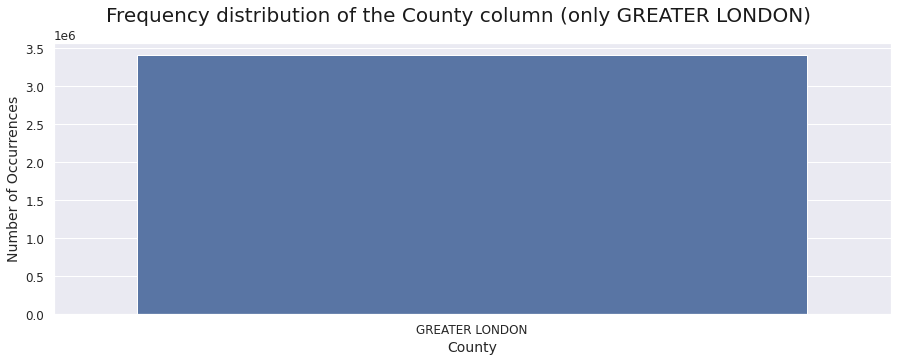

In [ ]:
# Click on the chart to zoom in
aux = county_distribution
fig = plt.figure(figsize=(15,5))
sns.barplot(x=aux.index, 
            y=aux.values)
# addlabels(x= aux.index,
#           y= aux.values)
fig.suptitle('Frequency distribution of the County column (only GREATER LONDON)', fontsize=20)

plt.xlabel('County', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=0)
plt.show()

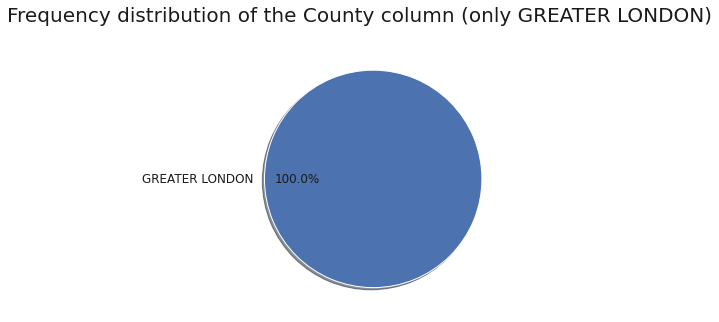

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Frequency distribution of the County column (only GREATER LONDON)', fontsize=20)
plt.pie(aux.values, labels=aux.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

* As we said before since we have the `Town/City and, District and County`, we know that there are many cities in a given county and that the location can be reached using the city and district. Often a metropolitan district can cover more than one city or town. `So we will use City/Village, as it covers the location even more accurately than District and County, which we could ignore for now as we implement our basic model.`

#####PPD_Category_Type
---
Indicates the type of Price Paid transaction.
* `A` = Standard Price Paid entry, includes single residential property sold for value.
* `B` = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales where the property type is classed as ‘Other’.

Note that category B does not separately identify the transaction types stated.
HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.

In [ ]:
print("In the column PPD_Category_Type, there are %.0f%% missing values"%(data_num_missing.loc["PPD_Category_Type", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["PPD_Category_Type", "number_missing"]))

In the column PPD_Category_Type, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['PPD_Category_Type']

unique          2
count     3406054
top             A
freq      3260527
Name: PPD_Category_Type, dtype: object

In [ ]:
print("In the column PPD_Category_Type contain {} unique values".format(summary['PPD_Category_Type']['unique']))

In the column PPD_Category_Type contain 2 unique values


In [ ]:
%%time
ppd_category_type_distribution = cat_data["PPD_Category_Type"].value_counts().compute()

CPU times: user 2min 8s, sys: 14.6 s, total: 2min 22s
Wall time: 3min 18s


In [ ]:
ppd_category_type_distribution

A    3260527
B     145527
Name: PPD_Category_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


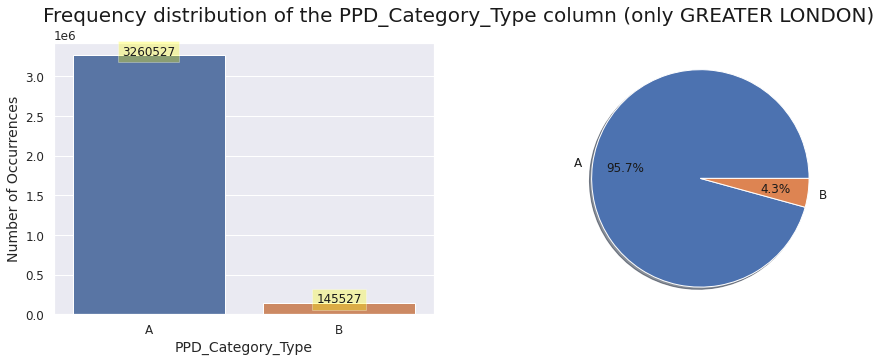

In [ ]:
# Click on the chart to zoom in
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1);

sns.barplot(x=ppd_category_type_distribution.index, 
            y=ppd_category_type_distribution.values)
addlabels(x= ppd_category_type_distribution.index,
          y= ppd_category_type_distribution.values)
fig.suptitle('''Frequency distribution of the PPD_Category_Type column (only GREATER LONDON)''', fontsize=20)
plt.subplot(1,2,1);
plt.xlabel('PPD_Category_Type', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=0)
plt.subplot(1,2,2);
plt.pie(ppd_category_type_distribution.values,
        labels=ppd_category_type_distribution.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

Indicates the type of Price Paid transaction:
  * A = Standard Price Paid entry, includes single residential property sold for value.
  * B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales where the property type is classed as ‘Other’.

**Note** that category B does not separately identify the transaction types stated.


As we can see, `most sales are of the Price Paid transaction type A`(3260527 sales), which includes individual residential properties sold for value, `and we will continue to work only on Price Paid type A transactions for the remainder of the modeling and predictions`, since type B does not separately identify the transaction types shown and includes transfers under a power of sale/recovery, lease-purchases, transfers to individuals, and sales where the property type is classified as "Other".

#####Record_Status_monthly_file_only
---
Indicates additions, changes and deletions to the records.(see guide below).
* `A` = Addition
* `C` = Change
* `D` = Delete

Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.

In [ ]:
print("In the column Record_Status_monthly_file_only, there are %.0f%% missing values"%(data_num_missing.loc["Record_Status_monthly_file_only", "percentage_missing"]))
print("The number of missing values = %d"%(data_num_missing.loc["Record_Status_monthly_file_only", "number_missing"]))

In the column Record_Status_monthly_file_only, there are 0% missing values
The number of missing values = 0


In [ ]:
summary['Record_Status_monthly_file_only']

unique          1
count     3406054
top             A
freq      3406054
Name: Record_Status_monthly_file_only, dtype: object

In [ ]:
print("In the column Record_Status_monthly_file_only contain {} unique values".format(summary['Town/City']['unique']))

In the column Record_Status_monthly_file_only contain 95 unique values


In [ ]:
%%time
record_status_monthly_file_only_distribution = cat_data["Record_Status_monthly_file_only"].value_counts().compute()

CPU times: user 2min 8s, sys: 13.3 s, total: 2min 22s
Wall time: 3min 17s


In [ ]:
record_status_monthly_file_only_distribution

A    3406054
Name: Record_Status_monthly_file_only, dtype: int64

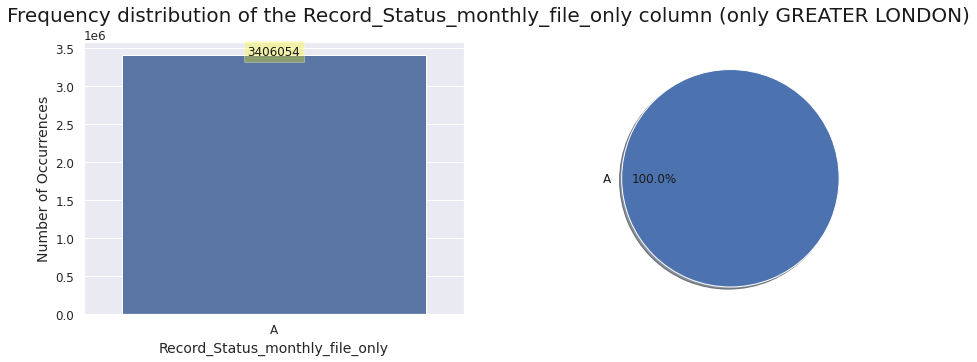

In [ ]:
# Click on the chart to zoom in
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
sns.barplot(x=record_status_monthly_file_only_distribution.index, 
            y=record_status_monthly_file_only_distribution.values)
addlabels(x= record_status_monthly_file_only_distribution.index,
          y= record_status_monthly_file_only_distribution.values)
fig.suptitle('''Frequency distribution of the Record_Status_monthly_file_only column (only GREATER LONDON)<''', fontsize=20)

plt.xlabel('Record_Status_monthly_file_only', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=0)

plt.subplot(1,2,2);
plt.pie(record_status_monthly_file_only_distribution.values, 
        labels= record_status_monthly_file_only_distribution.index, 
        pctdistance=0.7, labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

* Indicates that if a transaction changes category type due to a misassignment (as above), it will be removed from the original category type and added to the correct category with a new unique transaction identifier.

* For our purpose of predicting price, this feature does not contain information that could impact price, so we will not use it in the modeling part. 

#### Float64 types
--- 


In [ ]:
# Get all columns that have float64 dtype
data.select_dtypes(include=['float64']).columns

Index([], dtype='object')

#### Int64 types
---

In [ ]:
# Get all columns that have int64 dtype
data.select_dtypes(include=['int64']).columns

Index(['Price', 'Year_of_Transfer'], dtype='object')

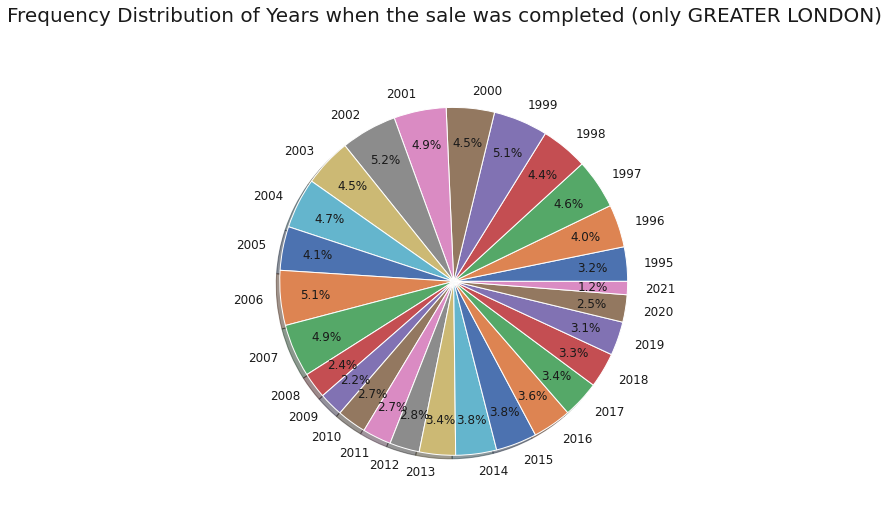

In [ ]:
# Plot the Frequency Distribution of Year_of_Transfer column (when the sale was completed)
fig = plt.figure(figsize=(10,8))
fig.suptitle('Frequency Distribution of Years when the sale was completed (only GREATER LONDON)', fontsize=20)
plt.pie(years_distribution.values, labels=years_distribution.index, pctdistance=0.8, 
        labeldistance=1.1, autopct='%1.1f%%', shadow=True) 
plt.show()

####Preparing our features
---
After analysing the Object/int64/int64 typed columns we gonna perform the following preprocessing process the prepare our features that we will use in the modeling part

* **Property_Type:** categorical ORDINAL with 5 different levels, and no missing values.We will have just to `Ordinal encode it`.
* **Old/New:** categorical ORDINAL with 2 different levels, and no missing values.We will have just to `Ordinal encode it`.

* **Duration:** categorical ORDINAL with 2 different levels, and no missing values.We will have just to `Ordinal encode it`.

* **Town/City:** categorical NOMINAL variable with 911715 different levels, and there are no missing values. We will simply have to `Onehot encode it`.

* **PPD_Category_Type == A:** we will continue to work only on Price Paid type A transactions for the remainder of the modeling and predictions to includes single residential property sold for value.


In [ ]:
data_num_missing.loc[["Property_Type", "Old/New", "Duration", "Town/City",
                      "Year_of_Transfer", "Price"], :]

#####Filter by PPD_Category_Type ==A 


In [14]:
# Filter by PPD_Category_Type ==A which are 25365945 sales
# Create separate DataFrame consisting of only columns that we gonna for modeling part
['Property_Type', 'Old/New', 'Duration', 'Town/City', 'Year_of_Transfer',
       'Price']
clean_data = copy(data[data.PPD_Category_Type == 'A'][['Property_Type', 'Old/New', 'Duration', 'Town/City', 'Year_of_Transfer',
       'Price']])
clean_data.info(verbose=True, memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 3260527 entries, 12 to 339898
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Property_Type     3260527 non-null      object
 1   Old/New           3260527 non-null      object
 2   Duration          3260527 non-null      object
 3   Town/City         3260527 non-null      object
 4   Year_of_Transfer  3260527 non-null      int64
 5   Price             3260527 non-null      int64
dtypes: object(4), int64(2)
memory usage: 174.1 MB


#####Filter by County == GREATER LONDON

In [ ]:
# Filter by County == GREATER LONDON 
data = copy(data[data['County'] == 'GREATER LONDON'])
data.info(verbose=True, memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 3406054 entries, 12 to 339898
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Transaction_unique_identifier    3406054 non-null      object
 1   Price                            3406054 non-null      int64
 2   Date_of_Transfer                 3406054 non-null      datetime64[ns]
 3   Postcode                         3400091 non-null      object
 4   Property_Type                    3406054 non-null      object
 5   Old/New                          3406054 non-null      object
 6   Duration                         3406054 non-null      object
 7   PAON                             3406003 non-null      object
 8   SAON                             1098382 non-null      object
 9   Street                           3403679 non-null      object
10   Locality                         1667543 non-null      object
11   Town/City       

In [ ]:
town_city_distribution = data["Town/City"].value_counts().compute()

In [ ]:
town_city_distribution

LONDON                 2030841
ROMFORD                  68521
CROYDON                  63390
ILFORD                   61745
ENFIELD                  58406
                        ...   
STAINES-UPON-THAMES          1
RUNCORN                      1
NORTHWICH                    1
NORTHAMPTON                  1
NEWPORT                      1
Name: Town/City, Length: 95, dtype: int64

#####Typecast categorical features to a category dtype

In [15]:
clean_data['Property_Type'] = clean_data['Property_Type'].astype('category')
clean_data['Old/New'] = clean_data['Old/New'].astype('category')
clean_data['Duration'] = clean_data['Duration'].astype('category')
clean_data['Town/City'] = clean_data['Town/City'].astype('category')
# Check the dtype after setting them
clean_data.info(verbose=True, memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 3260527 entries, 12 to 339898
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Property_Type     3260527 non-null      category
 1   Old/New           3260527 non-null      category
 2   Duration          3260527 non-null      category
 3   Town/City         3260527 non-null      category
 4   Year_of_Transfer  3260527 non-null      int64
 5   Price             3260527 non-null      int64
dtypes: category(4), int64(2)
memory usage: 87.3 MB


##### Encode features

######Property_Type

In [16]:
# F    1717632
# T     984935
# S     508034
# D     150194
# O      45259 Was deleted since its belong to PPD_Category_Type == B

# Create a replace map that gonna be used to replce Property_Type by the ranks 
property_type_replace_map = {'O':1, 'F':2, 'D':3, 'S':4, 'T':5}
# Map each Property_Type value in the replacement dictionary 
clean_data['Property_Type'] = clean_data['Property_Type'].map(property_type_replace_map)
property_type_distribution = clean_data["Property_Type"].value_counts().compute()
property_type_distribution

2    1654639
5     959998
4     499128
3     146762
Name: Property_Type, dtype: int64

######Old/New

In [17]:
# N    3094357
# Y     311697

# Create a replace map that gonna be used to replce Old/New by the ranks 
old_new_replace_map = {'Y':1, 'N':2}
# Map each Old/New value in the replacement dictionary 
clean_data['Old/New'] = clean_data['Old/New'].map(old_new_replace_map)
old_new_distribution = clean_data["Old/New"].value_counts().compute()
old_new_distribution

2    2969960
1     290567
Name: Old/New, dtype: int64

######Duration

In [18]:
# L    1770146
# F    1635816
# U         92

# Create a replace map that gonna be used to replce Duration by the ranks 
duration_replace_map = {'U':1, 'L':2, 'F':3}
# Map each Duration value in the replacement dictionary 
clean_data['Duration'] = clean_data['Duration'].map(duration_replace_map)
duration_distribution = clean_data["Duration"].value_counts().compute()
duration_distribution

2    1686544
3    1573891
1         92
Name: Duration, dtype: int64

#####Encoding Town/City 

In [ ]:
# LONDON                 2030841
# ROMFORD                  68521
# CROYDON                  63390
# ILFORD                   61745
# ENFIELD                  58406
#                         ...   
# STAINES-UPON-THAMES          1
# RUNCORN                      1
# NORTHWICH                    1
# NORTHAMPTON                  1
# NEWPORT                      1

######Sol 1: One-Hot Encoding

In [ ]:
clean_data.info(verbose=True, memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 3260527 entries, 12 to 339898
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Property_Type     3260527 non-null      float64
 1   Old/New           3260527 non-null      float64
 2   Duration          3260527 non-null      float64
 3   Town/City         3260527 non-null      category
 4   Year_of_Transfer  3260527 non-null      int64
 5   Price             3260527 non-null      int64
dtypes: category(1), float64(3), int64(2)
memory usage: 87.3 MB


In [97]:
sol1_clean_data = copy(dd.get_dummies(clean_data.categorize()).compute())

In [98]:
%%time
def clean_column(text):
    # Replace "/" by "_"
    text = text.replace("/","_")
    return text
sol1_clean_data.columns = [clean_column(item) for item in list(sol1_clean_data.columns)]

CPU times: user 0 ns, sys: 479 µs, total: 479 µs
Wall time: 489 µs


In [99]:
sol1_clean_data.columns

Index(['Property_Type', 'Old_New', 'Duration', 'Year_of_Transfer', 'Price',
       'Town_City_BANSTEAD', 'Town_City_BARKING', 'Town_City_BARNET',
       'Town_City_BECKENHAM', 'Town_City_BELVEDERE', 'Town_City_BEXLEY',
       'Town_City_BEXLEYHEATH', 'Town_City_BRENTFORD', 'Town_City_BROMLEY',
       'Town_City_BUCKHURST HILL', 'Town_City_CARSHALTON',
       'Town_City_CHESSINGTON', 'Town_City_CHIGWELL', 'Town_City_CHISLEHURST',
       'Town_City_COULSDON', 'Town_City_CROYDON', 'Town_City_DAGENHAM',
       'Town_City_DARTFORD', 'Town_City_EAST MOLESEY', 'Town_City_EDGWARE',
       'Town_City_ENFIELD', 'Town_City_ERITH', 'Town_City_FELTHAM',
       'Town_City_GREENFORD', 'Town_City_HAMPTON', 'Town_City_HARROW',
       'Town_City_HAYES', 'Town_City_HORNCHURCH', 'Town_City_HOUNSLOW',
       'Town_City_ILFORD', 'Town_City_ISLEWORTH', 'Town_City_KENLEY',
       'Town_City_KESTON', 'Town_City_KINGSTON UPON THAMES',
       'Town_City_LONDON', 'Town_City_MITCHAM', 'Town_City_MORDEN',
       'T

######Sol 2: Binary Encoding

In [22]:
# create an object of the OrdinalEncoding that goona be used to encode the city
binary_encoder = ce.BinaryEncoder(cols=['Town/City'], return_df=True)
# fit and transform and you will get the encoded data
sol2_clean_data = binary_encoder.fit_transform(clean_data.compute()) 
# Check the the new features that represent the city code using binary encoding
sol2_clean_data[sol2_clean_data.columns[sol2_clean_data.columns.str.contains('Town/City')]]

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Town/City_0,Town/City_1,Town/City_2,Town/City_3,Town/City_4,Town/City_5,Town/City_6,Town/City_7
12,0,0,0,0,0,0,0,1
14,0,0,0,0,0,0,1,0
15,0,0,0,0,0,0,1,1
31,0,0,0,0,0,0,1,0
48,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
339894,0,0,0,0,0,0,1,0
339895,0,0,0,0,1,1,1,0
339896,0,0,0,0,0,0,1,0
339897,0,0,0,0,0,0,1,0


######Sol 3: Hashing Encodin

In [ ]:
# create an object of the OrdinalEncoding
hashing_encoder = ce.HashingEncoder(cols=['Town/City'], return_df=True) #n_components=7
# fit and transform and you will get the encoded data
sol3_clean_data = hashing_encoder.fit_transform(clean_data.compute()) 
# Check the the new features that represent the city code using binary encoding
sol3_clean_data[sol3_clean_data.columns[sol3_clean_data.columns.str.contains('col_')]]

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


####Checking outliers


In [ ]:
(clean_data.describe(include='all').T).round(decimals=3)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Property_Type,3260527.0,4.0,2.0,1654639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Old_New,3260527.0,2.0,2.0,2969960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3260527.0,3.0,2.0,1686544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Transfer,3260527.0,NaN,NaN,NaN,2006.200,7.266,1995.0,2000.0,2005.0,2012.0,2021.0
Price,3260527.0,NaN,NaN,NaN,330652.189,472434.802,1.0,136500.0,230555.0,380000.0,90000000.0
...,...,...,...,...,...,...,...,...,...,...,...
Town_City_NEWPORT,3260527.0,NaN,NaN,NaN,0.000,0.001,0.0,0.0,0.0,0.0,1.0
Town_City_STAINES-UPON-THAMES,3260527.0,NaN,NaN,NaN,0.000,0.001,0.0,0.0,0.0,0.0,1.0
Town_City_SUNBURY-ON-THAMES,3260527.0,NaN,NaN,NaN,0.000,0.001,0.0,0.0,0.0,0.0,1.0
Town_City_NORTHWICH,3260527.0,NaN,NaN,NaN,0.000,0.001,0.0,0.0,0.0,0.0,1.0


In [ ]:
def numberOfOutliers(mySeries, upperOutlier, lowerOutlier):
    # The below code check to see if each value in a series falls within the outlier range.
    # If the value is greater than upperOutlier OR is less than the lowerOutlier value, check the True box
    #returns the total number of outliers for this series.
    return sum((mySeries > upperOutlier.loc[mySeries.name, ]) |\
               (mySeries < lowerOutlier.loc[mySeries.name,]))

def outlier_stats(df):
    numericDescribe = (df.describe(include='all').T).round(decimals=3)
    
    # Calculate outliers using the following formula:  
    # first quartile (25%) - 1.5-IQR > outlier > third quartile (75%) + 1.5-IQR
    numericDescribe['IQR'] = numericDescribe['75%'] - numericDescribe['25%']
    numericDescribe['outliers'] = (numericDescribe['max'] > (numericDescribe['75%'] + (1.5 * numericDescribe['IQR']))) \
                            | (numericDescribe['min'] < (numericDescribe['25%'] - (1.5 * numericDescribe['IQR'])))
    
    # Calculate the IQR for each column in the dataset    
    IQR = df.quantile(.75) - df.quantile(.25)
    
    # Calculate upperOutlier and lowerOutlier
    upperOutlier = df.quantile(.75) + (1.5 * (IQR))
    lowerOutlier = df.quantile(.25) - (1.5 * (IQR))
    
    # Save the result in a new column [num_outliers]
    numericDescribe['num_outliers'] = df.apply(numberOfOutliers, args=(upperOutlier, lowerOutlier))
    numericDescribe.sort_values('num_outliers', ascending=False, inplace=True)
    newColOrder = ['count', 'outliers', 'num_outliers', 'IQR', 'mean', 'std', \
               'min', '25%', '50%', '75%', 'max']
    numericDescribe = numericDescribe.reindex(columns=newColOrder)
    
    return numericDescribe

In [ ]:
clean_data[clean_data.columns[ ~clean_data.columns.str.contains('Town_City')]]

,Property_Type,Old_New,Duration,Year_of_Transfer,Price
12,5,2,3,1995,62750
14,4,2,3,1995,78000
15,4,2,3,1995,51000
31,4,2,3,1995,405000
48,5,2,3,1995,60000
...,...,...,...,...,...
339894,4,2,3,2021,875000
339895,5,2,3,2021,508000
339896,2,2,2,2021,490000
339897,2,2,2,2021,600000


In [ ]:
outlier_stats_df = outlier_stats(clean_data[['Price']])
outlier_stats_df

,count,outliers,num_outliers,IQR,mean,std,min,25%,50%,75%,max
Price,3260527.0,True,224964,243500.0,330652.189,472434.802,1.0,136500.0,230555.0,380000.0,90000000.0


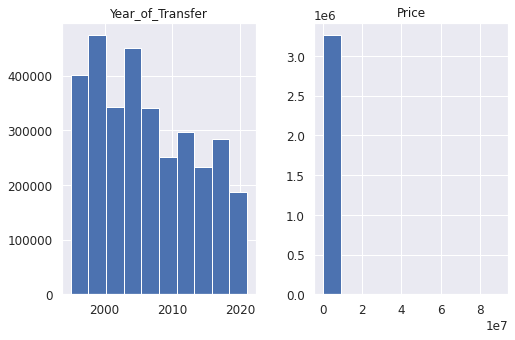

In [ ]:
# Plot the histogram of all columns except the ones that represent city codes
clean_data[clean_data.columns[ ~clean_data.columns.str.contains('Town_City')]].hist(figsize=(8,5));

####Correlations between features

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9), annot=False):
    """
    Creates a heatmap of correlations between features in the dataset df.
    
    Parameters:
          df(pd.DataFrame):the data frame for which we want to create the heatmap.
          figsize(tuple): the size of the created heatmap
    """

    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate mask that have the same size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    # Initialise the indices for the upper-triangle of mask array to TRUE.
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap between two HUSL colors (240, 10)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, 
                annot=annot, cbar_kws={"shrink": .70}, fmt='.2f',
                vmax=corr[corr != 1.0].max().max());

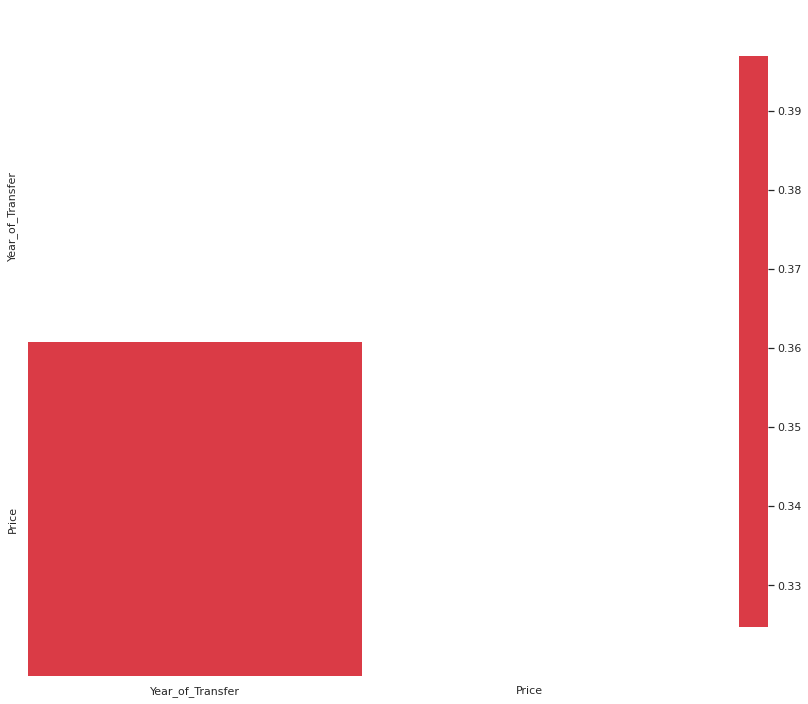

In [ ]:
multi_collinearity_heatmap(clean_data[clean_data.columns[ ~clean_data.columns.str.contains('Town_City')]], figsize=(15,15))

## Analysis and visualisations

### Price

In [ ]:
#descriptive statistics summary
clean_data['Price'].describe()

count    3.260527e+06
mean     3.306522e+05
std      4.724348e+05
min      1.000000e+00
25%      1.365000e+05
50%      2.305550e+05
75%      3.800000e+05
max      9.000000e+07
Name: Price, dtype: float64

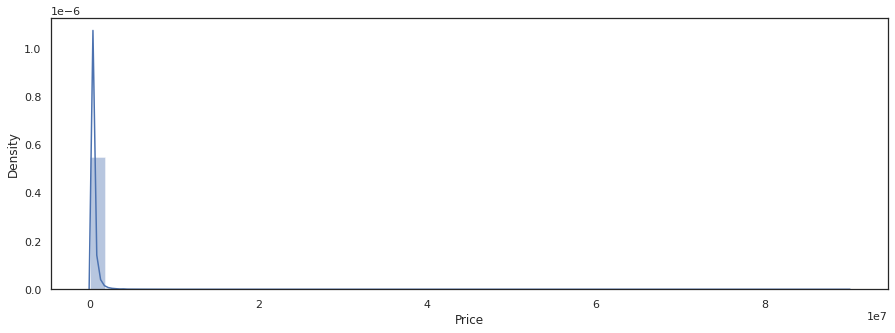

In [ ]:
#histogram
sns.distplot(clean_data['Price']);

In [ ]:
clean_data.columns

Index(['Property_Type', 'Old_New', 'Duration', 'Year_of_Transfer', 'Price',
       'Town_City_BANSTEAD', 'Town_City_BARKING', 'Town_City_BARNET',
       'Town_City_BECKENHAM', 'Town_City_BELVEDERE', 'Town_City_BEXLEY',
       'Town_City_BEXLEYHEATH', 'Town_City_BRENTFORD', 'Town_City_BROMLEY',
       'Town_City_BUCKHURST HILL', 'Town_City_CARSHALTON',
       'Town_City_CHESSINGTON', 'Town_City_CHIGWELL', 'Town_City_CHISLEHURST',
       'Town_City_COULSDON', 'Town_City_CROYDON', 'Town_City_DAGENHAM',
       'Town_City_DARTFORD', 'Town_City_EAST MOLESEY', 'Town_City_EDGWARE',
       'Town_City_ENFIELD', 'Town_City_ERITH', 'Town_City_FELTHAM',
       'Town_City_GREENFORD', 'Town_City_HAMPTON', 'Town_City_HARROW',
       'Town_City_HAYES', 'Town_City_HORNCHURCH', 'Town_City_HOUNSLOW',
       'Town_City_ILFORD', 'Town_City_ISLEWORTH', 'Town_City_KENLEY',
       'Town_City_KESTON', 'Town_City_KINGSTON UPON THAMES',
       'Town_City_LONDON', 'Town_City_MITCHAM', 'Town_City_MORDEN',
       'T

In [ ]:
# result = data.Price.min()  # create the tasks graph
# %time result.compute()     # perform actual computation
clean_data.Price.min()

1

* Min price: £1 !!!


In [ ]:
# result = data.Price.max()  
# %time result.compute() 
clean_data.Price.max()

90000000

* Max price: £900,000,00


In [ ]:
# clean_data["Price"].describe().compute()

In [ ]:
clean_data[clean_data.Price == 1].head()

,Property_Type,Old_New,Duration,Year_of_Transfer,Price,Town_City_BANSTEAD,Town_City_BARKING,Town_City_BARNET,Town_City_BECKENHAM,Town_City_BELVEDERE,Town_City_BEXLEY,Town_City_BEXLEYHEATH,Town_City_BRENTFORD,Town_City_BROMLEY,Town_City_BUCKHURST HILL,Town_City_CARSHALTON,Town_City_CHESSINGTON,Town_City_CHIGWELL,Town_City_CHISLEHURST,Town_City_COULSDON,Town_City_CROYDON,Town_City_DAGENHAM,Town_City_DARTFORD,Town_City_EAST MOLESEY,Town_City_EDGWARE,Town_City_ENFIELD,Town_City_ERITH,Town_City_FELTHAM,Town_City_GREENFORD,Town_City_HAMPTON,Town_City_HARROW,Town_City_HAYES,Town_City_HORNCHURCH,Town_City_HOUNSLOW,Town_City_ILFORD,Town_City_ISLEWORTH,Town_City_KENLEY,Town_City_KESTON,Town_City_KINGSTON UPON THAMES,Town_City_LONDON,...,Town_City_STANMORE,Town_City_SURBITON,Town_City_SUTTON,Town_City_SWANLEY,Town_City_TEDDINGTON,Town_City_THORNTON HEATH,Town_City_TWICKENHAM,Town_City_UPMINSTER,Town_City_UXBRIDGE,Town_City_WALLINGTON,Town_City_WALTHAM CROSS,Town_City_WARLINGHAM,Town_City_WELLING,Town_City_WEMBLEY,Town_City_WEST DRAYTON,Town_City_WEST WICKHAM,Town_City_WESTERHAM,Town_City_WHYTELEAFE,Town_City_WOODFORD GREEN,Town_City_WORCESTER PARK,Town_City_ASHFORD,Town_City_CATERHAM,Town_City_EPSOM,Town_City_RUNCORN,Town_City_BUSHEY,Town_City_BOREHAMWOOD,Town_City_POTTERS BAR,Town_City_BRENTWOOD,Town_City_SOUTH OCKENDON,Town_City_WALTHAM ABBEY,Town_City_WISBECH,Town_City_LEATHERHEAD,Town_City_WARRINGTON,Town_City_SHREWSBURY,Town_City_SUTTON COLDFIELD,Town_City_NEWPORT,Town_City_STAINES-UPON-THAMES,Town_City_SUNBURY-ON-THAMES,Town_City_NORTHWICH,Town_City_GATESHEAD
56745,5,2,3,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69843,5,2,3,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77690,2,2,2,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86536,2,1,2,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86537,2,1,2,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data[data.Price == 1].count().compute()
clean_data[clean_data.Price == 1].shape[0]

26

* The price paid data set contains 26 sales where the price was `£1`, which should be an error.

In [ ]:
#average price per year in england and wales
# clean_data.groupby(['Year_of_Transfer'])['Price'].mean().compute()
clean_data.groupby(['Year_of_Transfer'])['Price'].mean()

Year_of_Transfer
1995     97728.580099
1996    105468.971109
1997    119906.593681
1998    135137.066479
1999    158467.254240
2000    188813.478030
2001    204986.992374
2002    233367.472076
2003    251422.644811
2004    275703.322666
2005    290414.358683
2006    316160.489564
2007    352916.892940
2008    362148.250052
2009    362772.141745
2010    408360.863376
2011    421356.171475
2012    437685.384449
2013    473864.867673
2014    525384.053259
2015    545442.368141
2016    586053.850926
2017    620261.268337
2018    621511.311251
2019    629133.451766
2020    664794.267810
2021    671158.451232
Name: Price, dtype: float64

In [ ]:
#average price per year in London
# london_avg = data.loc[df['Town/City'] == 'LONDON'].groupby(['Year_of_Transfer'])['Price'].mean()
# london_avg = london_avg.compute()
# london_avg
avg_london = clean_data.loc[clean_data['Town_City_LONDON']==1].groupby(['Year_of_Transfer'])['Price'].mean()
avg_london

Year_of_Transfer
1995    109115.596340
1996    118670.251304
1997    136509.139854
1998    152982.091494
1999    180647.849334
2000    215829.066435
2001    232995.650699
2002    263678.712553
2003    278405.219657
2004    304693.447024
2005    322842.024665
2006    356169.212117
2007    404063.315248
2008    420479.768242
2009    427858.941248
2010    480374.513844
2011    496367.629551
2012    518924.972605
2013    567600.171852
2014    639344.626049
2015    653535.339974
2016    695472.953671
2017    739990.098759
2018    734136.913128
2019    746658.327925
2020    789227.702886
2021    787246.635554
Name: Price, dtype: float64

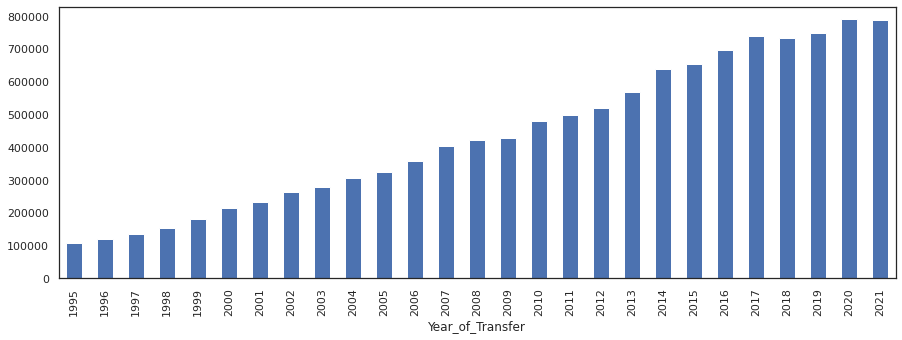

In [ ]:
#bar chart of average price of London property each year since 1995
avg_london.plot.bar()

####Relationship with Year_of_Transfer variables

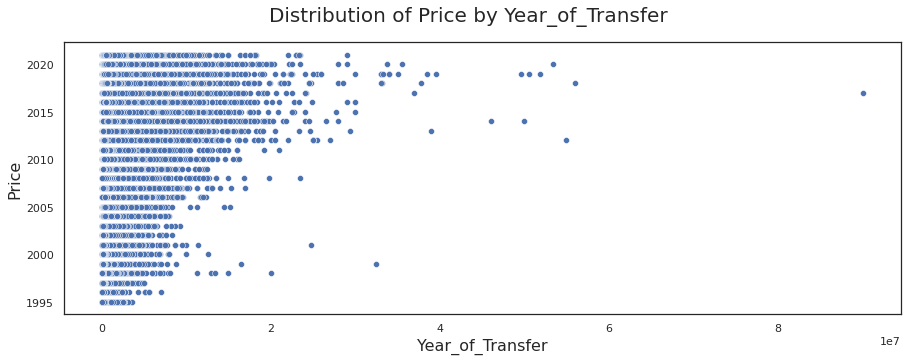

CPU times: user 6.41 s, sys: 21.6 ms, total: 6.44 s
Wall time: 6.4 s


In [ ]:
%%time
#scatter plot Year_of_Transfer/Price
fig = plt.figure(figsize=(15,5))
g=sns.scatterplot(data=clean_data, x="Price", y="Year_of_Transfer")
fig.suptitle('Distribution of Price by Year_of_Transfer', fontsize=20)
plt.xlabel('Year_of_Transfer', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show()

####Relationship with categorical features


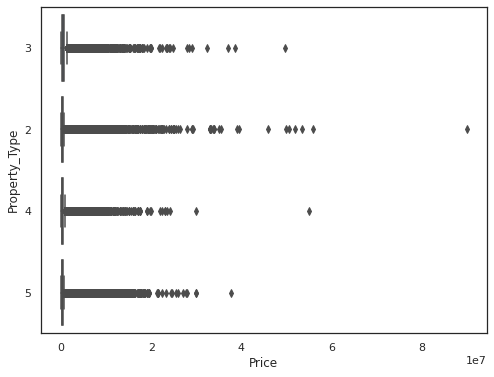

In [ ]:
#box plot Price / Property_Type
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Price", y="Property_Type", data=clean_data)


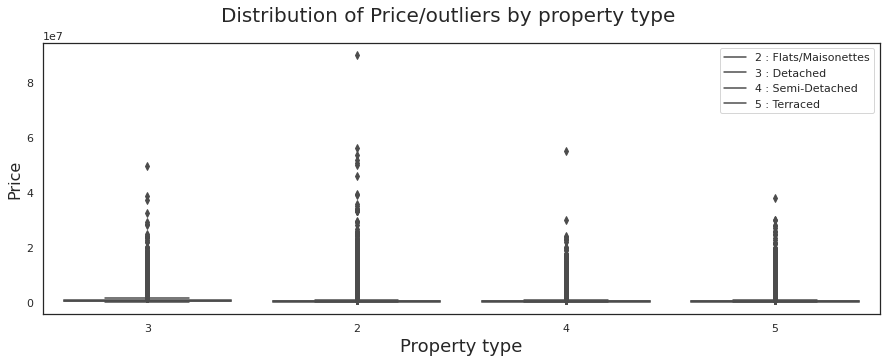

CPU times: user 1.12 s, sys: 19.2 ms, total: 1.14 s
Wall time: 1.12 s


In [ ]:
%%time
fig = plt.figure(figsize=(15,5))
g=sns.boxplot(x='Property_Type', y='Price',data=clean_data)
fig.suptitle('Distribution of Price/outliers by property type', fontsize=20)
plt.xlabel('Property type', fontsize=18)
plt.ylabel('Price', fontsize=16)
plt.xticks(rotation=0)
plt.legend(('2 : Flats/Maisonettes','3 : Detached','4 : Semi-Detached','5 : Terraced'))
plt.show()

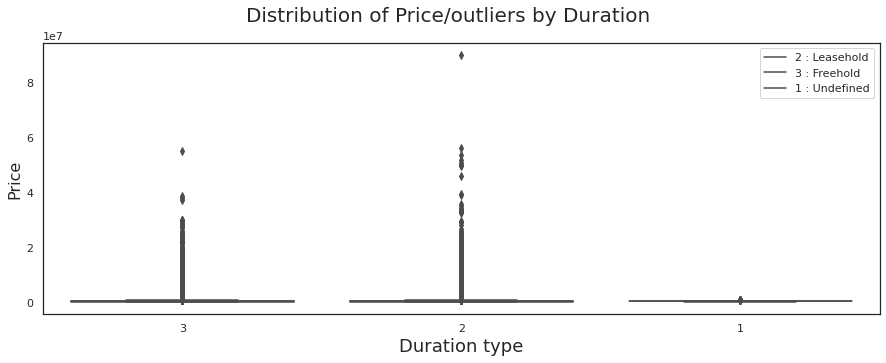

CPU times: user 1.06 s, sys: 31.4 ms, total: 1.09 s
Wall time: 1.08 s


In [ ]:
%%time
fig = plt.figure(figsize=(15,5))
g=sns.boxplot(x='Duration', y='Price',data=clean_data)
fig.suptitle('Distribution of Price/outliers by Duration', fontsize=20)
plt.xlabel('Duration type', fontsize=18)
plt.ylabel('Price', fontsize=16)
plt.xticks(rotation=0)
plt.legend(('2 : Leasehold','3 : Freehold','1 : Undefined'))
plt.show()

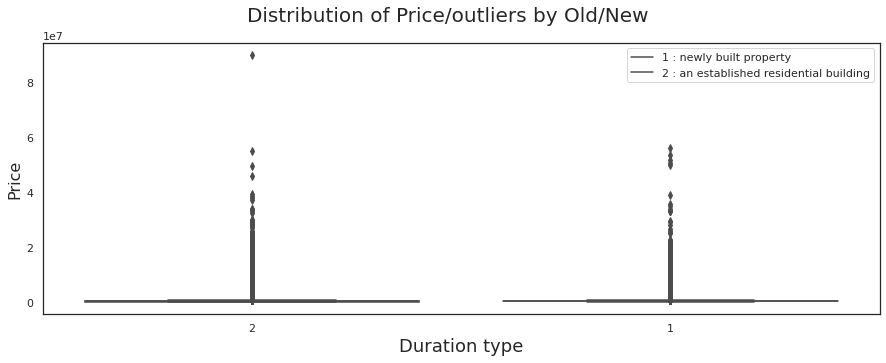

CPU times: user 1.04 s, sys: 11.3 ms, total: 1.05 s
Wall time: 1.04 s


In [ ]:
%%time
fig = plt.figure(figsize=(15,5))
g=sns.boxplot(x='Old_New', y='Price',data=clean_data)
fig.suptitle('Distribution of Price/outliers by Old/New', fontsize=20)
plt.xlabel('Duration type', fontsize=18)
plt.ylabel('Price', fontsize=16)
plt.xticks(rotation=0)
plt.legend(('1 : newly built property','2 : an established residential building'))
plt.show()

### County

In [ ]:
%%time
county_distribution = data["County"].value_counts().compute()

CPU times: user 1min 57s, sys: 14.1 s, total: 2min 11s
Wall time: 3min 8s


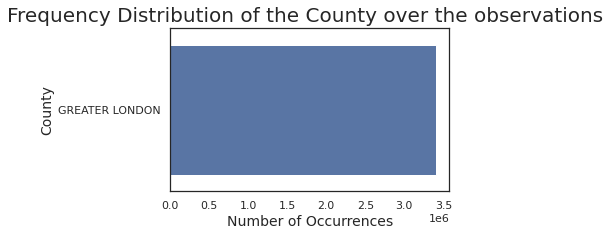

CPU times: user 301 ms, sys: 6.96 ms, total: 308 ms
Wall time: 308 ms


In [ ]:
%%time
# Click on the chart to zoom in
fig = plt.figure(figsize=(5,3))
sns.barplot(y=county_distribution.index, x=county_distribution.values)
fig.suptitle('Frequency Distribution of the County over the observations', fontsize=20)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.xticks(rotation=0)
plt.show()

* We have already seen that GREATER LONDON is the county with the most real estate sales in England with 3406054 sales, so we decided to filter our data to work only with sales from GREATER LONDON for the computation resons. 

### Town/City

In [ ]:
%%time
town_city_distribution = data["Town/City"].value_counts().compute()

CPU times: user 2min 1s, sys: 15.1 s, total: 2min 16s
Wall time: 3min 9s


In [ ]:
town_city_distribution

LONDON                 2030841
ROMFORD                  68521
CROYDON                  63390
ILFORD                   61745
ENFIELD                  58406
                        ...   
STAINES-UPON-THAMES          1
RUNCORN                      1
NORTHWICH                    1
NORTHAMPTON                  1
NEWPORT                      1
Name: Town/City, Length: 95, dtype: int64

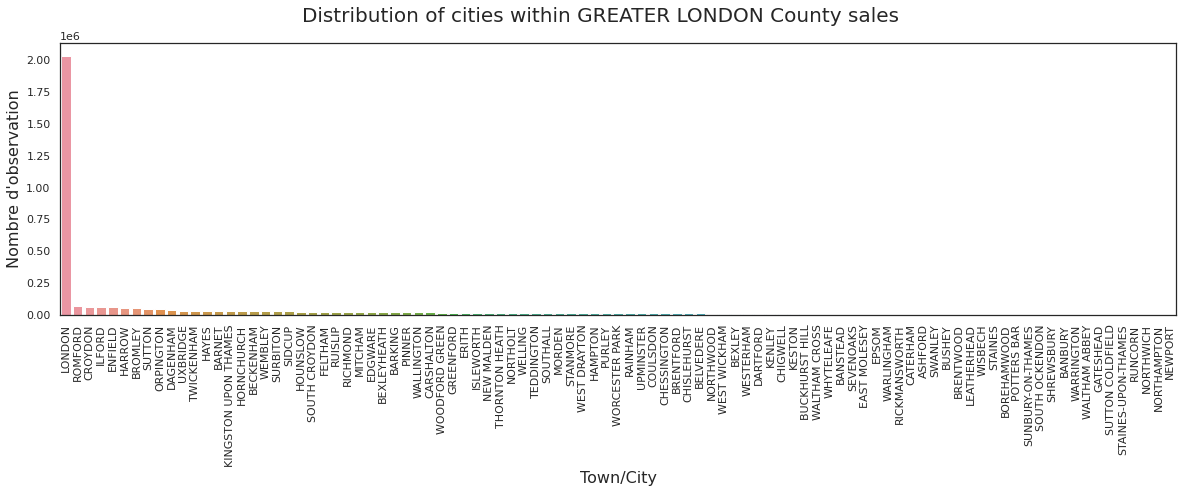

In [ ]:
aux = town_city_distribution.to_frame()
aux.columns=['number_obs']
aux.sort_values(by='number_obs', ascending=False, inplace=True)
x = [str(i) for i in aux.index]
y = [int(j) for j in aux.number_obs]
fig = plt.figure(figsize=(20,5))
g=sns.barplot(x, y)
fig.suptitle('Distribution of cities within GREATER LONDON County sales', fontsize=20)
plt.xlabel('Town/City', fontsize=16)
plt.ylabel('Nombre d\'observation', fontsize=16)
plt.xticks(rotation=90)
del aux
plt.show()

* We can see that LONDON is the city with the most real estate sales in England with 2031341 registred sales. 

### Further Analysis

[Text(0, 0, 'Freehold'), Text(0, 0, 'Leasehold'), Text(0, 0, 'Undefined')]

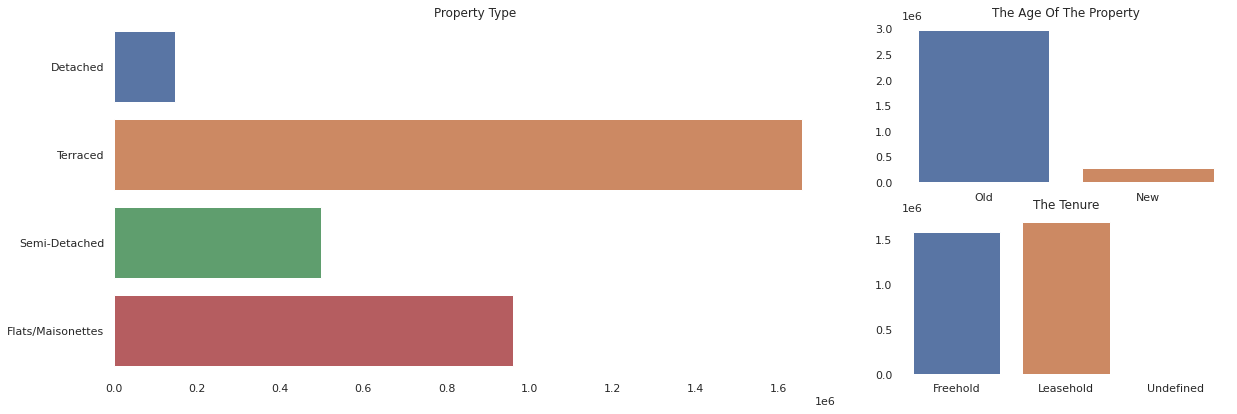

In [ ]:
# -- Descriptive Data 
# Plotting the graphs

fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=2, colspan=2) # Type
ax2 = plt.subplot2grid((3, 3), (0, 2)) # New
ax3 = plt.subplot2grid((3, 3), (1, 2)) # Duration

# Type : D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other 
sns.countplot(y="Property_Type", data=clean_data, ax=ax1)
sns.despine(left=True, bottom=True)

ax1.set(ylabel="", xlabel="", title="Property Type")
ax1.set_yticklabels(["Detached", "Terraced", "Semi-Detached", "Flats/Maisonettes", "Other"])

# New : 1 = New, 0 = Old 
sns.countplot(x="Old_New", data=clean_data, ax=ax2)
sns.despine(left=True, bottom=True)

ax2.set(ylabel="", xlabel="", title="The Age Of The Property")
ax2.set_xticklabels(["Old","New"])

# Duration : F = Freehold, L= Leasehold
sns.countplot(x="Duration", data=clean_data, ax=ax3)
sns.despine(left=True, bottom=True)

ax3.set(ylabel="", xlabel="", title="The Tenure")
ax3.set_xticklabels(["Freehold","Leasehold", "Undefined"])

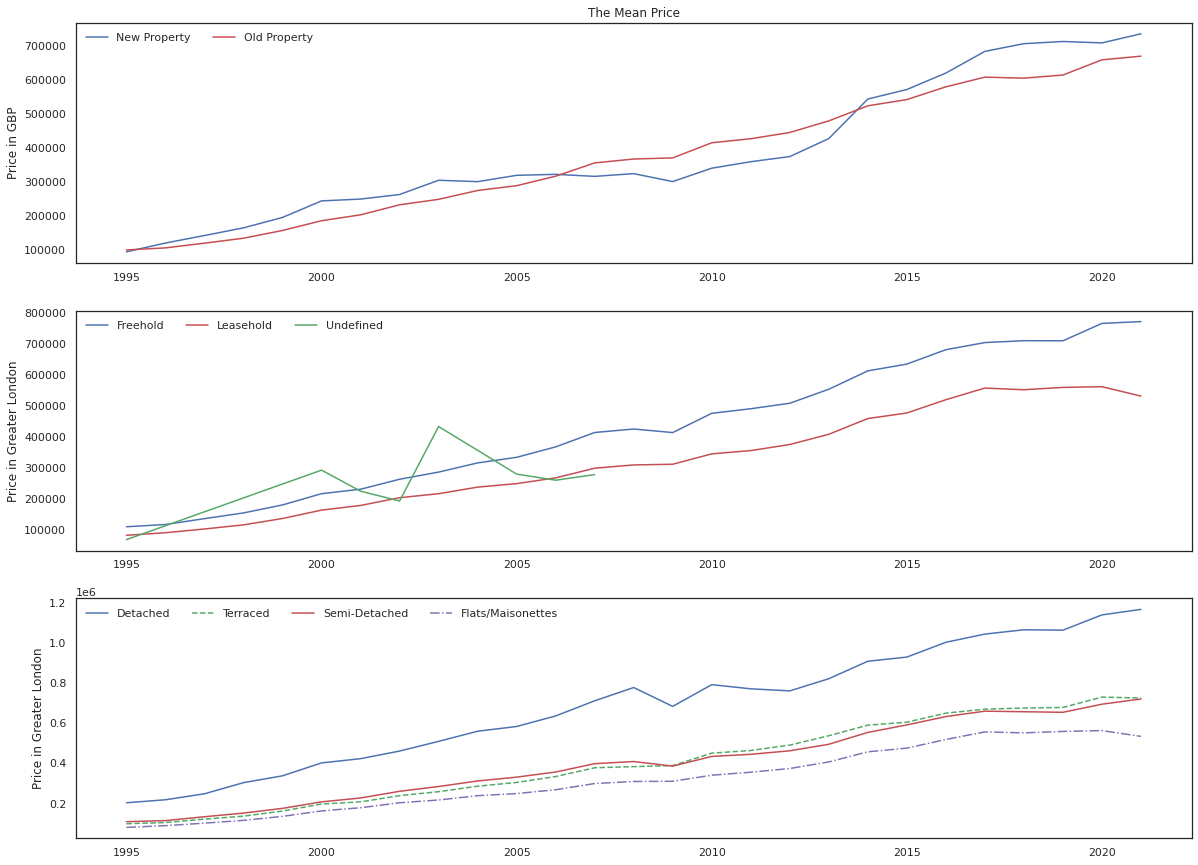

In [ ]:
fig = plt.figure(figsize=(20, 15))

# The mean Price by the age of the property
price_mean_new = clean_data[clean_data["Old_New"] == 1].groupby("Year_of_Transfer").Price.mean()
price_mean_old = clean_data[clean_data["Old_New"] == 2].groupby("Year_of_Transfer").Price.mean()

ax4 = plt.subplot2grid((3, 3), (0, 0), colspan=3) # The mean Price by Age of Property

ax4.plot(price_mean_new, "b-", label="New Property")
ax4.plot(price_mean_old, "r-", label="Old Property")
ax4.set(ylabel="Price in GBP", xlabel="", title="The Mean Price")
ax4.legend(ncol=2, loc="upper left", frameon=False)

# The mean Price by Tenure
price_mean_f = clean_data[clean_data["Duration"] == 3].groupby("Year_of_Transfer").Price.mean()
price_mean_l = clean_data[clean_data["Duration"] == 2].groupby("Year_of_Transfer").Price.mean()
price_mean_u = clean_data[clean_data["Duration"] == 1].groupby("Year_of_Transfer").Price.mean()

ax5 = plt.subplot2grid((3, 3), (1, 0), colspan=3) # The mean Price by Tenure

ax5.plot(price_mean_f, "b-", label="Freehold")
ax5.plot(price_mean_l, "r-", label="Leasehold")
ax5.plot(price_mean_u, "g-", label="Undefined")
ax5.set(ylabel="Price in Greater London", xlabel="", title="")
# ax5.set_xticklabels(m)
ax5.legend(ncol=3, loc="upper left", frameon=False)

# The mean Price by Type
price_mean_d = clean_data[clean_data["Property_Type"] == 3].groupby("Year_of_Transfer").Price.mean()
price_mean_t = clean_data[clean_data["Property_Type"] == 5].groupby("Year_of_Transfer").Price.mean()
price_mean_sd = clean_data[clean_data["Property_Type"] == 4].groupby("Year_of_Transfer").Price.mean()
price_mean_fm = clean_data[clean_data["Property_Type"] == 2].groupby("Year_of_Transfer").Price.mean()
ax6 = plt.subplot2grid((3, 3), (2, 0), colspan=3) # The mean Price by Type

ax6.plot(price_mean_d, "b-", label="Detached")
ax6.plot(price_mean_t, "g--", label="Terraced")
ax6.plot(price_mean_sd, "r-", label="Semi-Detached")
ax6.plot(price_mean_fm, "m-.", label="Flats/Maisonettes")

ax6.set(ylabel="Price in Greater London", xlabel="", title="")
ax6.legend(ncol=5, loc="upper left", frameon=False)

# Modeling & Prediction

##Train_test_split

In [23]:
sol1_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3260527 entries, 12 to 339898
Data columns (total 98 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   Property_Type                   category
 1   Old_New                         category
 2   Duration                        category
 3   Year_of_Transfer                int64   
 4   Price                           int64   
 5   Town_City_BANSTEAD              uint8   
 6   Town_City_BARKING               uint8   
 7   Town_City_BARNET                uint8   
 8   Town_City_BECKENHAM             uint8   
 9   Town_City_BELVEDERE             uint8   
 10  Town_City_BEXLEY                uint8   
 11  Town_City_BEXLEYHEATH           uint8   
 12  Town_City_BRENTFORD             uint8   
 13  Town_City_BROMLEY               uint8   
 14  Town_City_BUCKHURST HILL        uint8   
 15  Town_City_CARSHALTON            uint8   
 16  Town_City_CHESSINGTON           uint8   
 17  Town_Cit

#### Sol1 Cleaned data

In [100]:
# Remove sales with price = 1
sol1_clean_data = sol1_clean_data[sol1_clean_data.Price != 1]
sol1_clean_data.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3260501 entries, 12 to 339898
Data columns (total 98 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   Property_Type                   category
 1   Old_New                         category
 2   Duration                        category
 3   Year_of_Transfer                int64   
 4   Price                           int64   
 5   Town_City_BANSTEAD              uint8   
 6   Town_City_BARKING               uint8   
 7   Town_City_BARNET                uint8   
 8   Town_City_BECKENHAM             uint8   
 9   Town_City_BELVEDERE             uint8   
 10  Town_City_BEXLEY                uint8   
 11  Town_City_BEXLEYHEATH           uint8   
 12  Town_City_BRENTFORD             uint8   
 13  Town_City_BROMLEY               uint8   
 14  Town_City_BUCKHURST HILL        uint8   
 15  Town_City_CARSHALTON            uint8   
 16  Town_City_CHESSINGTON           uint8   
 17  Town_Cit

In [73]:
sol1_clean_data.duplicated().sum() 

2290056

In [92]:
# Drope duplicates
# sol1_clean_data = sol1_clean_data.drop_duplicates(keep=False)
# sol1_clean_data.shape

(628417, 98)

In [27]:
sol1_clean_data.to_csv('/content/sol1_clean_data.csv')

In [7]:
sol1_clean_data = pd.read_csv('/content/sol1_clean_data.csv')

In [8]:
sol1_clean_data.columns

Index(['Unnamed: 0', 'Property_Type', 'Old_New', 'Duration',
       'Year_of_Transfer', 'Price', 'Town_City_BANSTEAD', 'Town_City_BARKING',
       'Town_City_BARNET', 'Town_City_BECKENHAM', 'Town_City_BELVEDERE',
       'Town_City_BEXLEY', 'Town_City_BEXLEYHEATH', 'Town_City_BRENTFORD',
       'Town_City_BROMLEY', 'Town_City_BUCKHURST HILL', 'Town_City_CARSHALTON',
       'Town_City_CHESSINGTON', 'Town_City_CHIGWELL', 'Town_City_CHISLEHURST',
       'Town_City_COULSDON', 'Town_City_CROYDON', 'Town_City_DAGENHAM',
       'Town_City_DARTFORD', 'Town_City_EAST MOLESEY', 'Town_City_EDGWARE',
       'Town_City_ENFIELD', 'Town_City_ERITH', 'Town_City_FELTHAM',
       'Town_City_GREENFORD', 'Town_City_HAMPTON', 'Town_City_HARROW',
       'Town_City_HAYES', 'Town_City_HORNCHURCH', 'Town_City_HOUNSLOW',
       'Town_City_ILFORD', 'Town_City_ISLEWORTH', 'Town_City_KENLEY',
       'Town_City_KESTON', 'Town_City_KINGSTON UPON THAMES',
       'Town_City_LONDON', 'Town_City_MITCHAM', 'Town_City_MORD

In [17]:
reduced_clean_data = sol1_clean_data[['Property_Type', 'Old_New', 'Duration',
       'Year_of_Transfer', 'Price', 'Town_City_LONDON']]
reduced_clean_data = reduced_clean_data[(reduced_clean_data.Year_of_Transfer == 2018) | (reduced_clean_data.Year_of_Transfer == 2019)\
                                     |(reduced_clean_data.Year_of_Transfer == 2020)| (reduced_clean_data.Year_of_Transfer == 2021)]
# reduced_clean_data.drop(["Year_of_Transfer"], inplace=True, axis=1)
reduced_clean_data.head()

,Property_Type,Old_New,Duration,Year_of_Transfer,Price,Town_City_LONDON
2985744,2,2,2,2018,527000,1
2985745,2,2,2,2018,350000,1
2985746,2,2,2,2018,602000,1
2985747,2,2,2,2018,510000,1
2985748,5,2,3,2018,1400000,1


####Sol2 Cleaned data

In [28]:
# Remove sales with price = 1
sol2_clean_data = sol2_clean_data[sol2_clean_data.Price != 1]
sol2_clean_data.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3260501 entries, 12 to 339898
Data columns (total 13 columns):
 #   Column            Dtype   
---  ------            -----   
 0   Property_Type     category
 1   Old/New           category
 2   Duration          category
 3   Town/City_0       int64   
 4   Town/City_1       int64   
 5   Town/City_2       int64   
 6   Town/City_3       int64   
 7   Town/City_4       int64   
 8   Town/City_5       int64   
 9   Town/City_6       int64   
 10  Town/City_7       int64   
 11  Year_of_Transfer  int64   
 12  Price             int64   
dtypes: category(3), int64(10)
memory usage: 283.0 MB


In [29]:
sol2_clean_data.shape 

(3260501, 13)

In [30]:
sol2_clean_data.to_csv('/content/sol2_clean_data.csv')

In [ ]:
sol2_clean_data = pd.read_csv('/content/sol2_clean_data.csv')

In [41]:
reduced_clean_data = sol2_clean_data[(sol2_clean_data.Year_of_Transfer == 2019) | (sol2_clean_data.Year_of_Transfer == 2020)]
# reduced_clean_data.drop(["Year_of_Transfer"], axis=1)
reduced_clean_data.columns

Index(['Property_Type', 'Old/New', 'Duration', 'Town/City_0', 'Town/City_1',
       'Town/City_2', 'Town/City_3', 'Town/City_4', 'Town/City_5',
       'Town/City_6', 'Town/City_7', 'Year_of_Transfer', 'Price'],
      dtype='object')

####Train_Test

In [12]:
reduced_clean_data.shape

(274757, 5)

In [18]:
X = reduced_clean_data.drop(columns=['Price']).values
y = reduced_clean_data['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Triying Scaling
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("Train set X:",X_train.shape, "y:", y_train.shape)
print("Val set  X:",X_val.shape, "y:",y_val.shape)
print("Test set X:",X_test.shape, "y:", y_test.shape)

Train set X: (185460, 5) y: (185460,)
Val set  X: (61821, 5) y: (61821,)
Test set X: (27476, 5) y: (27476,)


##XGBoost

In [19]:
import xgboost as xgb

### XGBoost compatible data ###
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dvalid = xgb.DMatrix(data = X_val, label = y_val)

### defining parameters ###
params = {
          'alpha': 10, # L1 regularization term on weight very high dimensionality so that the algorithm runs faster 
          'colsample': 0.9, # percentage of samples used per tree. Low value can lead to underfitting
          'colsample_bytree': 0.5, # percentage of features used per tree. High value can lead to overfitting.
          'eta': 0.1, # learning rate
          'max_depth': 8, # determines how deeply each tree is allowed to grow during any boosting round.
          'min_child_weight': 6, # Control overfitting, too high model will underfit
          'objective': 'reg:linear', # for classification problems with probability
          'subsample': 0.9 # percentage of samples used per tree. Low value can lead to underfitting.
          }

# Fit the model on training data
### Training the model ###
xgb_model = xgb.train(
                      params,
                      dtrain,
                      num_boost_round= 1000,
                      evals=[(dvalid, "Validation")],
                      early_stopping_rounds=30
                      )

[15:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Validation-rmse:989754
Will train until Validation-rmse hasn't improved in 30 rounds.
[1]	Validation-rmse:953360
[2]	Validation-rmse:925585
[3]	Validation-rmse:897925
[4]	Validation-rmse:878619
[5]	Validation-rmse:861701
[6]	Validation-rmse:844896
[7]	Validation-rmse:833819
[8]	Validation-rmse:822839
[9]	Validation-rmse:815582
[10]	Validation-rmse:808574
[11]	Validation-rmse:802185
[12]	Validation-rmse:797701
[13]	Validation-rmse:793702
[14]	Validation-rmse:790624
[15]	Validation-rmse:786565
[16]	Validation-rmse:784340
[17]	Validation-rmse:782767
[18]	Validation-rmse:781386
[19]	Validation-rmse:780326
[20]	Validation-rmse:779571
[21]	Validation-rmse:777455
[22]	Validation-rmse:776729
[23]	Validation-rmse:775792
[24]	Validation-rmse:775300
[25]	Validation-rmse:774584
[26]	Validation-rmse:774185
[27]	Validation-rmse:773912
[28]	Validation-rmse:773395
[29]	Val

In [20]:
### Reformatting test set for XGB ###
dtest = xgb.DMatrix(X_test, y_test )

train_preds_xgb_reg = xgb_model.predict(dtrain)
test_preds_xgb_reg = xgb_model.predict(dtest)

print("\nTrain MSE:", round(mean_squared_error(y_train, train_preds_xgb_reg),4))
print("Test MSE:", round(mean_squared_error(y_test, test_preds_xgb_reg),4))
print("\nTrain r2:", round(r2_score(y_train, train_preds_xgb_reg),4))
print("Test r2:", round(r2_score(y_test, test_preds_xgb_reg),4))


Train MSE: 570475636425.6812
Test MSE: 511209491813.1219

Train r2: 0.099
Test r2: 0.1121


In [86]:
import math
print("Train RMSE:", round(math.sqrt(mean_squared_error(y_train, train_preds_xgb_reg)),4))
print("Test RMSE:", round(math.sqrt(mean_squared_error(y_test, test_preds_xgb_reg)),4))

Train RMSE: 1191389.6677
Test RMSE: 1127933.8597


##Cross Validation

In [21]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round= 100,
    seed=42,
    nfold=5,
    early_stopping_rounds=30
)

[15:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,983465.7625,5010.952765,983259.6375,20549.405104
1,948864.2000,4960.924336,948663.3125,21243.082279
2,918698.3375,6387.984616,918447.4875,20582.726836
3,894074.9500,6463.601082,893840.8500,21005.897197
4,873401.4375,6421.671168,873151.2625,21436.913530


In [25]:
test_rmse_mean = cv_results['test-rmse-mean']
best_iteration = test_rmse_mean[test_rmse_mean == min(test_rmse_mean)].index[0]

best_train_rmse_mean = cv_results['train-rmse-mean'][best_iteration]
best_train_rmse_mean_std = cv_results['train-rmse-std'][best_iteration]

best_test_rmse_mean = cv_results['test-rmse-mean'][best_iteration]
best_test_rmse_mean_std = cv_results['test-rmse-std'][best_iteration]

print('''XGB CV model report
Best train-rmse-mean {} (std: {}%) 
Best test-rmse-mean {} (std: {}%)'''.format(round(best_test_rmse_mean * 100, 2), 
                                          round(best_train_rmse_mean_std * 100, 2), 
                                          round(best_test_rmse_mean * 100, 2), 
                                          round(best_test_rmse_mean_std * 100, 2)))


XGB CV model report
Best train-rmse-mean 75565636.25 (std: 546302.33%) 
Best test-rmse-mean 75565636.25 (std: 2203101.31%)


# Fine Tuning

In [28]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(8,12)
    for min_child_weight in range(5,8)
]

In [33]:
# Define initial best params and MAE
min_test_logloss_mean = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round= 100,
        seed=42,
        nfold=5,
        early_stopping_rounds=30    
    )
    # Update best test-rmse-mean
    test_rmse_mean = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\ttest_rmse_mean {} for {} rounds".format(test_rmse_mean, boost_rounds))
    if test_rmse_mean < min_test_rmse_mean:
        min_test_rmse_mean = test_rmse_mean
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {},  test-rmse-mean: {}".format(best_params[0], best_params[1],  min_test_rmse_mean))


CV with max_depth=8, min_child_weight=5
[15:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	test_rmse_mean 755656.3625 for 99 rounds


NameError: ignored

# Feature Selection
---
In addition to its superior performance, the use of decision tree method sets such as gradient boosting has the advantage of being able to automatically provide estimates of feature importance from a trained predictive model.

In general, importance provides a score that indicates the usefulness or value of each feature in building boosted decision trees within the model. The more a feature is used to make key decisions with the decision trees, the higher its relative importance.

This importance is computed explicitly for each feature in the dataset, allowing features to be ranked and compared with each other.

In [34]:
Features_inmportance = xgb_model.get_score(importance_type='gain')
Features_inmportance

{'f0': 38834469456407.74,
 'f1': 14290270991387.24,
 'f2': 62720555052929.41,
 'f3': 1118504218887.0596,
 'f4': 153143972567263.3}

Index(['Property_Type', 'Old_New', 'Duration', 'Year_of_Transfer',
       'Town_City_LONDON'],
      dtype='object')

In [50]:
idx = reduced_clean_data.drop(columns=['Price']).columns
ft_weights_xgb_reg = pd.DataFrame(Features_inmportance.values(), columns=['weight'], index=idx)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(10)

,weight
Duration,1.531440e+14
Year_of_Transfer,6.272056e+13
Town_City_LONDON,3.883447e+13
Property_Type,1.429027e+13
Old_New,1.118504e+12


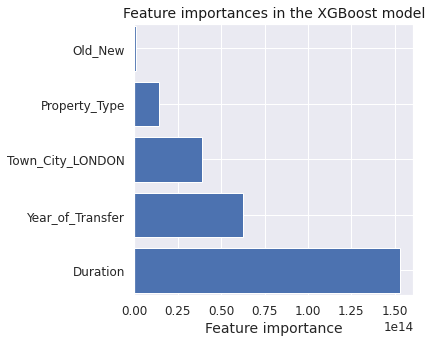

In [53]:

# Plotting feature importances
plt.figure(figsize=(5,5))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [ ]:
import xgboost as xgb
# Create instace
xgb_reg = xgb.XGBRegressor()

# Fit the model on training data
xgb_reg.fit(X_train, y_train)

training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))